## Header

In [35]:
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

def read_gmt(fpath):
    gdict = {}
    
    with open(fpath, 'r') as f:
        lines = f.readlines()
        for line in lines:
            items = line.strip().rstrip().split('\t')
            gset = items[0].lower()
            genes = items[2:]
            gdict[gset] = genes            
    return gdict

anndata.__version__

<Version('0.7.1')>

## regulons

In [10]:
auc = pd.read_csv('../data/pySCENIC/AucMg.csv', index_col=0)
auc

ATF1      ATF3      ATF4     ATF6B     BACH1  \
Cell                                                                      
AL1:AAAGGGCCAGCAATTCx  0.093687  0.021922  0.403083  0.000000  0.000000   
AL1:AACAAAGGTTGAATCCx  0.093025  0.028635  0.339407  0.000000  0.000000   
AL1:AAAGTGACAGACTCTAx  0.085527  0.029396  0.365364  0.000000  0.000000   
AL1:AAACGCTGTCTACAACx  0.083664  0.018900  0.361530  0.000000  0.000000   
AL1:AACAAAGGTCAAAGATx  0.090449  0.020672  0.431114  0.061499  0.043251   
...                         ...       ...       ...       ...       ...   
AL1:TTTATGCAGTAGTCCTx  0.022902  0.063431  0.128841  0.000000  0.038980   
AL1:TTTACGTCATAAGCAAx  0.024417  0.065677  0.145461  0.000000  0.031030   
AL1:TTTGACTCAGTTTGGTx  0.033646  0.069330  0.133450  0.000000  0.043369   
AL1:TTTGGAGCAGGCTTGCx  0.021777  0.063755  0.145137  0.000000  0.029496   
AL1:TTTGTTGTCGCCGTGAx  0.024940  0.064210  0.132624  0.000000  0.040615   

                        BHLHE40      BRF2     CEBPB     CEBPG     CEBPZ  ...  \
Cell                                                                     ...   
AL1:AAAGGGCCAGCAATTCx  0.052082  0.036763  0.095552  0.082768  0.069588  ...   
AL1:AACAAAGGTTGAATCCx  0.052928  0.043632  0.102575  0.079513  0.064178  ...   
AL1:AAAGTGACAGACTCTAx  0.049582  0.038306  0.101363  0.095266  0.068908  ...   
AL1:AAACGCTGTCTACAACx  0.048405  0.032200  0.100771  0.128642  0.069584  ...   
AL1:AACAAAGGTCAAAGATx  0.049389  0.043912  0.101684  0.130138  0.069412  ...   
...                         ...       ...       ...       ...       ...  ...   
AL1:TTTATGCAGTAGTCCTx  0.016529  0.015986  0.111390  0.147367  0.103841  ...   
AL1:TTTACGTCATAAGCAAx  0.016452  0.011364  0.119389  0.147131  0.108587  ...   
AL1:TTTGACTCAGTTTGGTx  0.017094  0.016985  0.111007  0.145238  0.098498  ...   
AL1:TTTGGAGCAGGCTTGCx  0.021143  0.013306  0.117666  0.156344  0.105067  ...   
AL1:TTTGTTGTCGCCGTGAx  0.019600  0.011023  0.105738  0.125121  0.105027  ...   

                            SRF       TBP     TEAD2     TFDP1     THAP1  \
Cell                                                                      
AL1:AAAGGGCCAGCAATTCx  0.025053  0.063955  0.066794  0.073970  0.042495   
AL1:AACAAAGGTTGAATCCx  0.031093  0.188478  0.046347  0.078197  0.051469   
AL1:AAAGTGACAGACTCTAx  0.024251  0.193369  0.046039  0.082745  0.050827   
AL1:AAACGCTGTCTACAACx  0.024479  0.000000  0.047820  0.086694  0.056549   
AL1:AACAAAGGTCAAAGATx  0.025591  0.000000  0.054324  0.079942  0.054174   
...                         ...       ...       ...       ...       ...   
AL1:TTTATGCAGTAGTCCTx  0.000000  0.104253  0.000000  0.114449  0.103824   
AL1:TTTACGTCATAAGCAAx  0.013851  0.098622  0.026193  0.111274  0.114563   
AL1:TTTGACTCAGTTTGGTx  0.000000  0.095342  0.025573  0.110061  0.104207   
AL1:TTTGGAGCAGGCTTGCx  0.014840  0.094282  0.000000  0.095889  0.106921   
AL1:TTTGTTGTCGCCGTGAx  0.013356  0.084602  0.000000  0.085756  0.091176   

                         THAP11      USF1      USF2       YY1    ZBTB7A  
Cell                                                                     
AL1:AAAGGGCCAGCAATTCx  0.074736  0.024788  0.075857  0.075142  0.000000  
AL1:AACAAAGGTTGAATCCx  0.068505  0.030055  0.078550  0.077915  0.000000  
AL1:AAAGTGACAGACTCTAx  0.074520  0.017459  0.078470  0.076929  0.000000  
AL1:AAACGCTGTCTACAACx  0.074176  0.016441  0.076883  0.078747  0.000000  
AL1:AACAAAGGTCAAAGATx  0.068548  0.027525  0.070237  0.077512  0.000000  
...                         ...       ...       ...       ...       ...  
AL1:TTTATGCAGTAGTCCTx  0.092832  0.047138  0.083293  0.084967  0.015989  
AL1:TTTACGTCATAAGCAAx  0.098136  0.041926  0.092338  0.088712  0.022496  
AL1:TTTGACTCAGTTTGGTx  0.099174  0.076455  0.088325  0.089953  0.019490  
AL1:TTTGGAGCAGGCTTGCx  0.096886  0.049356  0.086524  0.084805  0.019457  
AL1:TTTGTTGTCGCCGTGAx  0.104065  0.042729  0.085106  0.085053  0.023028  

[4614 rows x 60 columns]

In [19]:
fpath = '../data/scVelo/AL1.h5ad'
AL1 = anndata.read_h5ad(fpath)
meta = AL1.obs
AL1

AnnData object with n_obs × n_vars = 4614 × 3000 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'louvain', 'CellType', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [22]:
ref_norm = anndata.read_h5ad('../data/scVelo/AL1_ref_norm.h5ad')

sel = meta.loc[:,['CellType']]
sel.loc[:,'cts'] = ref_norm['CASP7',:].X.toarray()

sel

KeyError: 'CASP7'

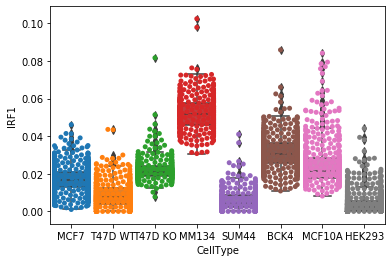

In [15]:
sns.boxplot(data=sel, x='CellType', y='IRF1')
sns.swarmplot(data=sel, x='CellType', y='IRF1',dodge=True)

In [25]:
wt['IRF1'].values


array([4.19528226e-03, 5.53487393e-03, 1.88688884e-03, 2.49818755e-02,
       7.22520529e-03, 9.12063819e-03, 1.53721018e-02, 4.34007103e-02,
       2.92040302e-03, 4.90293508e-03, 7.44439808e-03, 1.97803993e-02,
       5.85054541e-03, 1.97815187e-03, 1.45557265e-02, 9.60874967e-03,
       1.01244449e-02, 5.89902984e-03, 0.00000000e+00, 1.36432988e-02,
       7.72406901e-03, 2.37208883e-03, 1.42676532e-02, 3.55813324e-03,
       4.25226903e-03, 1.91339316e-02, 1.15577085e-02, 1.20219504e-02,
       5.48696936e-03, 1.29386663e-03, 5.33893313e-03, 0.00000000e+00,
       1.01665279e-02, 9.06427032e-03, 4.75101943e-03, 6.26567870e-03,
       1.54597619e-02, 1.68889847e-02, 2.25326056e-02, 1.09273931e-02,
       4.67941755e-03, 6.12641737e-03, 6.78381464e-03, 4.00165063e-03,
       1.24185665e-02, 3.77035823e-03, 9.36402091e-03, 8.04071895e-03,
       5.93818731e-03, 2.86957252e-03, 7.92815034e-03, 3.89769113e-03,
       1.23434949e-02, 3.82150427e-03, 4.38134624e-03, 1.51074405e-03,
      

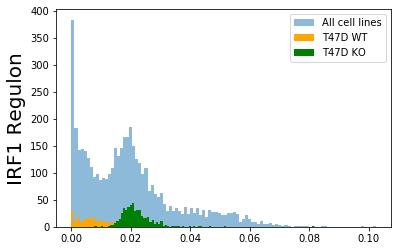

In [33]:
_=plt.hist(sel['IRF1'].values, bins=100, alpha=.5, label='All cell lines')
wt, ko = sel[sel['CellType']=='T47D WT'], sel[sel['CellType']=='T47D KO']
_=plt.hist(wt['IRF1'].values, bins=100, color='orange',label='T47D WT')
_=plt.hist(ko['IRF1'].values, bins=100, color='green',label='T47D KO')
plt.ylabel('IRF1 Regulon',fontsize=20)
plt.legend()

## Screening gene candidates

In [34]:
ref_norm = anndata.read_h5ad('../data/scVelo/AL1_ref_norm.h5ad')
ref_norm

AnnData object with n_obs × n_vars = 4614 × 21888 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'CellType'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [59]:
t47d = sc.read('../data/scVelo/t47d.ref_norm.h5ad')
t47d

AnnData object with n_obs × n_vars = 1000 × 16818 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'louvain', 'CellType', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced'

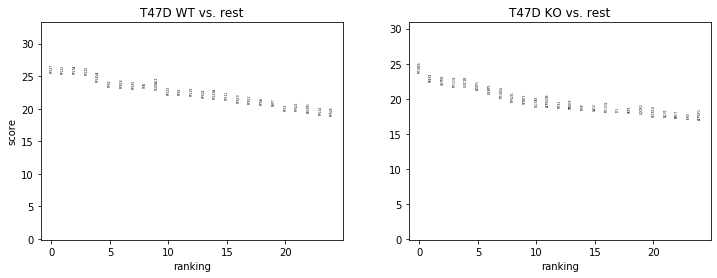

Index(['T47D WT', 'T47D KO'], dtype='object')


In [60]:
from utils import gather_degs
sc.tl.rank_genes_groups(t47d, 'CellType', method='wilcoxon', n_genes=10000)
sc.pl.rank_genes_groups(t47d, n_genes=25, sharey=False, fontsize=3)
DEgDict = gather_degs(t47d)

In [61]:
# save results
DEgDict['T47D WT'].to_csv('../data/DEGs/T47D_WT_hi_vs_KO.10000genes.csv')
DEgDict['T47D KO'].to_csv('../data/DEGs/T47D_KO_hi_vs_WT.10000genes.csv')

In [64]:
ko_hi = pd.read_csv('../data/DEGs/T47D_KO_hi_vs_WT.10000genes.csv', index_col=0)

In [69]:
gmt1, gmt2 = read_gmt('../data/GSVA/h.all.v6.2.symbols.gmt'), read_gmt('../data/GSVA/h.all.v6.2.symbols.gmt')
genes = list(set([g for g in gmt1['HALLMARK_APOPTOSIS'.lower()] if g in ko_hi.index] + [g for g in gmt2['HALLMARK_P53_PATHWAY'.lower()] if g in ko_hi.index]))
ko_hi_sel = ko_hi.loc[genes,:]
ko_hi_sel = ko_hi_sel[ko_hi_sel['pvals_adj']<0.1].sort_values('logfoldchanges', ascending=False)
ko_hi_sel

scores  logfoldchanges         pvals     pvals_adj
CYFIP2      4.285029        3.955837  1.827151e-05  2.191799e-04
IER3       17.288500        1.656644  5.742724e-67  1.441509e-64
TXNIP       7.749409        1.547539  9.232100e-15  2.907593e-13
SAT1       12.050865        1.492959  1.919257e-33  1.537051e-31
NUPR1      16.475954        1.317781  5.461990e-61  1.106744e-58
ABAT        6.643821        1.251873  3.056530e-11  7.312194e-10
CASP7       9.280653        1.228023  1.684431e-20  7.782625e-19
OSGIN1      8.106403        1.197317  5.213996e-16  1.796905e-14
SLC3A2     11.544283        1.156095  7.889667e-31  5.845305e-29
CTSF       11.190683        1.137566  4.529303e-29  3.160739e-27
SQSTM1     12.908527        1.124529  4.029317e-38  3.939829e-36
RPS27L     19.730080        1.100122  1.189825e-86  6.454994e-84
PPP2R5B     2.984737        1.086305  2.838222e-03  2.148210e-02
HIST1H1C   10.688153        1.026923  1.156509e-26  7.312095e-25
BCL2L1      9.689335        0.956925  3.347006e-22  1.670325e-20
GM2A        3.697741        0.947464  2.175271e-04  2.125724e-03
INHBB       5.022891        0.811530  5.089943e-07  7.649925e-06
TIMP1       4.842313        0.798260  1.283363e-06  1.851081e-05
IER5        7.961416        0.781933  1.700817e-15  5.630776e-14
LGALS3     16.167362        0.774508  8.568969e-59  1.583658e-56
ETF1       10.596824        0.748499  3.082723e-26  1.878451e-24
PPP1R15A    3.242846        0.731702  1.183421e-03  9.926567e-03
VAMP8      15.030236        0.726245  4.653456e-51  6.689044e-49
DNAJC3      7.985617        0.703741  1.398211e-15  4.665699e-14
EPHX1       8.901210        0.691640  5.524142e-19  2.271516e-17
DDIT3       4.621108        0.646256  3.816961e-06  5.168571e-05
DDIT4       2.520535        0.628564  1.171767e-02  7.328664e-02
TNFRSF12A   6.853638        0.595870  7.199525e-12  1.826269e-10
PEA15       4.468783        0.501745  7.866590e-06  1.012244e-04
HINT1      15.641726        0.500555  3.783334e-55  6.002652e-53
MDM2        2.799779        0.470920  5.113763e-03  3.553854e-02
CEBPA       2.487244        0.466715  1.287369e-02  7.942399e-02
CCND3       3.842947        0.434177  1.215655e-04  1.250452e-03
MCL1        3.950703        0.406322  7.792202e-05  8.347086e-04
H2AFJ      10.997512        0.399796  3.928212e-28  2.653199e-26
CLU         2.924508        0.373012  3.450013e-03  2.550432e-02
RAD51C      4.263785        0.370418  2.009930e-05  2.377145e-04
TRAF4       3.238028        0.357593  1.203590e-03  1.006563e-02
FUCA1       2.440704        0.354829  1.465868e-02  8.836188e-02
PLXNB2      3.135748        0.350243  1.714165e-03  1.378710e-02
TPD52L1     6.203382        0.313052  5.526244e-10  1.180945e-08
SERTAD3     2.392958        0.307241  1.671314e-02  9.838346e-02
EPS8L2      3.213060        0.277173  1.313288e-03  1.088559e-02
FDXR        2.487025        0.228553  1.288162e-02  7.944376e-02
TM7SF3      2.635189        0.215398  8.409044e-03  5.479400e-02
VDAC2       5.161637        0.202350  2.447996e-07  3.822692e-06
ISCU        3.462190        0.196429  5.357991e-04  4.780408e-03
HRAS        2.571237        0.154524  1.013361e-02  6.445802e-02
EBP         2.558862        0.106288  1.050153e-02  6.647151e-02

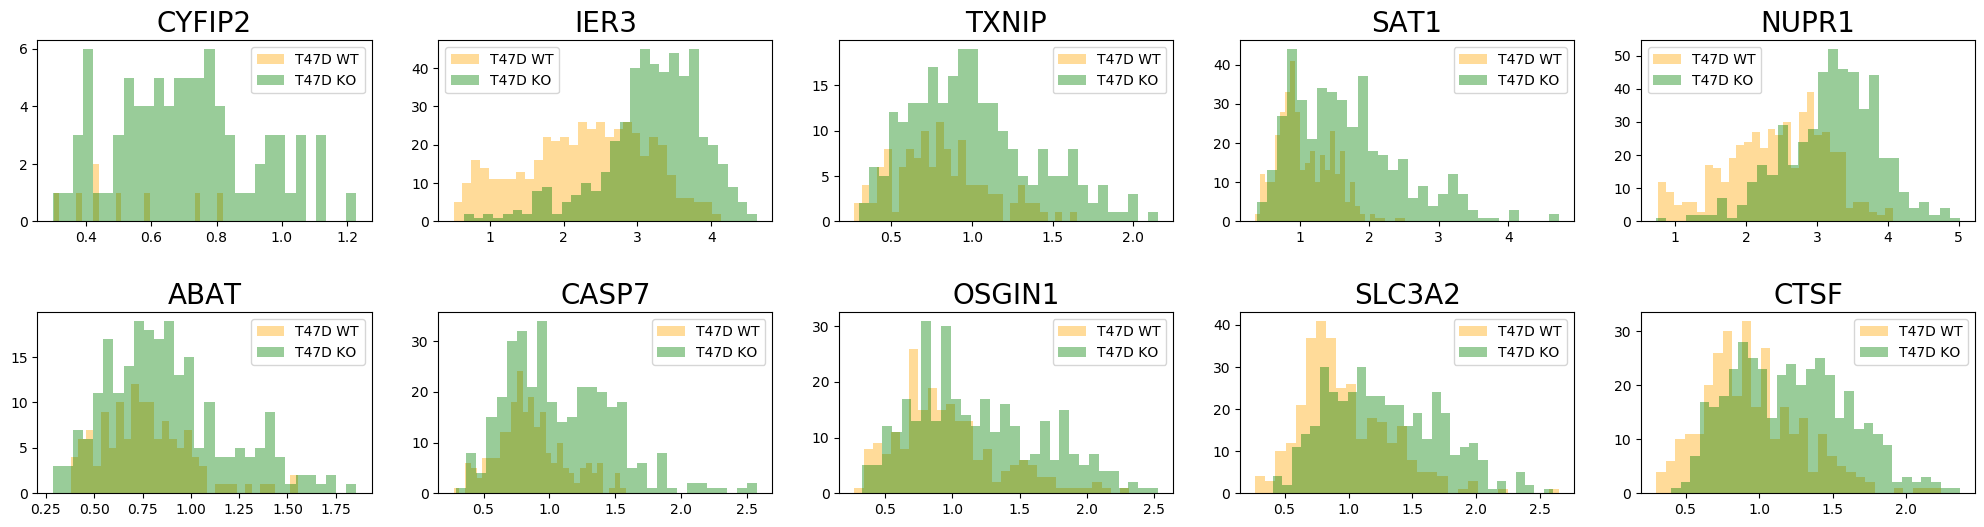

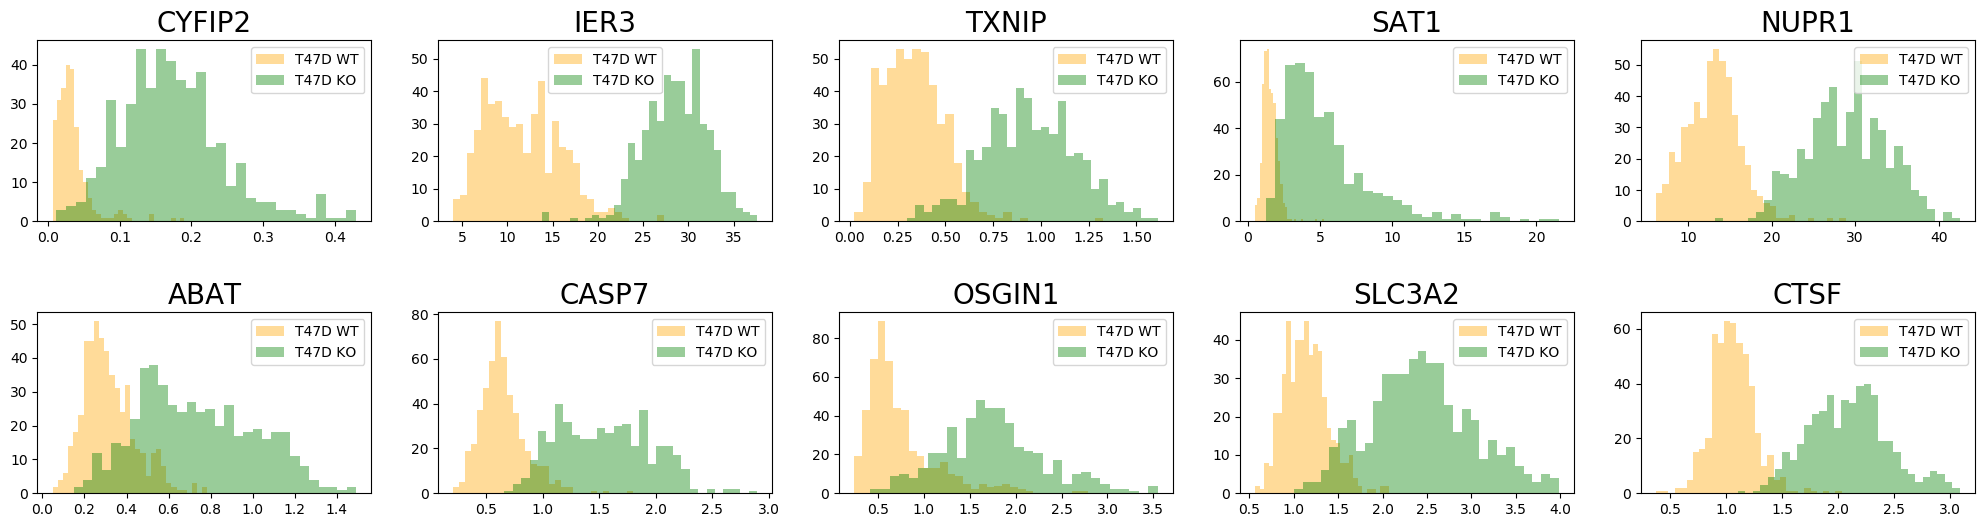

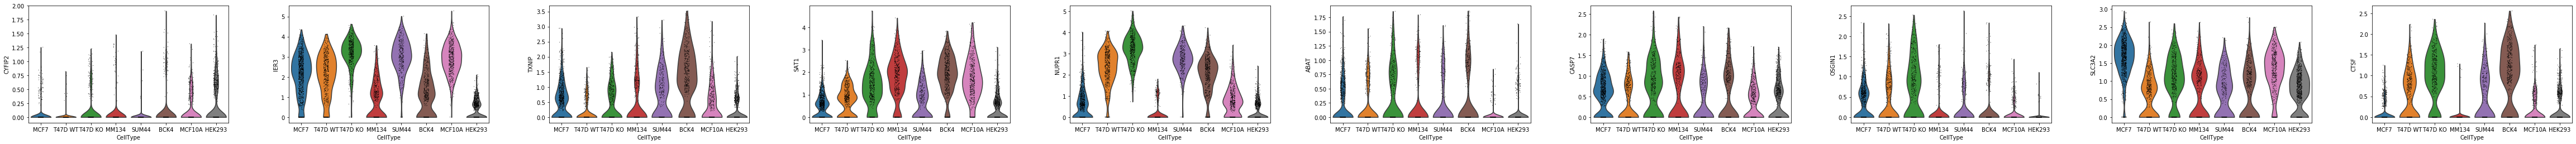

In [72]:
genes_sel = ko_hi_sel.index[:10]

# X
nplots = len(genes_sel)
ncols = 5
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes_sel):
    
    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].X.toarray()
    ko_expr = ref_norm[cells_ko,gene].X.toarray()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)
    ax.legend()
    
# Ms    
nplots = len(genes_sel)
ncols = 5
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes_sel):
    
    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].layers['Ms'].toarray().flatten()
    ko_expr = ref_norm[cells_ko,gene].layers['Ms'].toarray().flatten()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)
    ax.legend()
    
# sc violin
sc.pl.violin(ref_norm, groupby='CellType', keys=[g for g in genes_sel if g in ref_norm.var_names], jitter=True, size=1, raw=True, multi_panel=True)

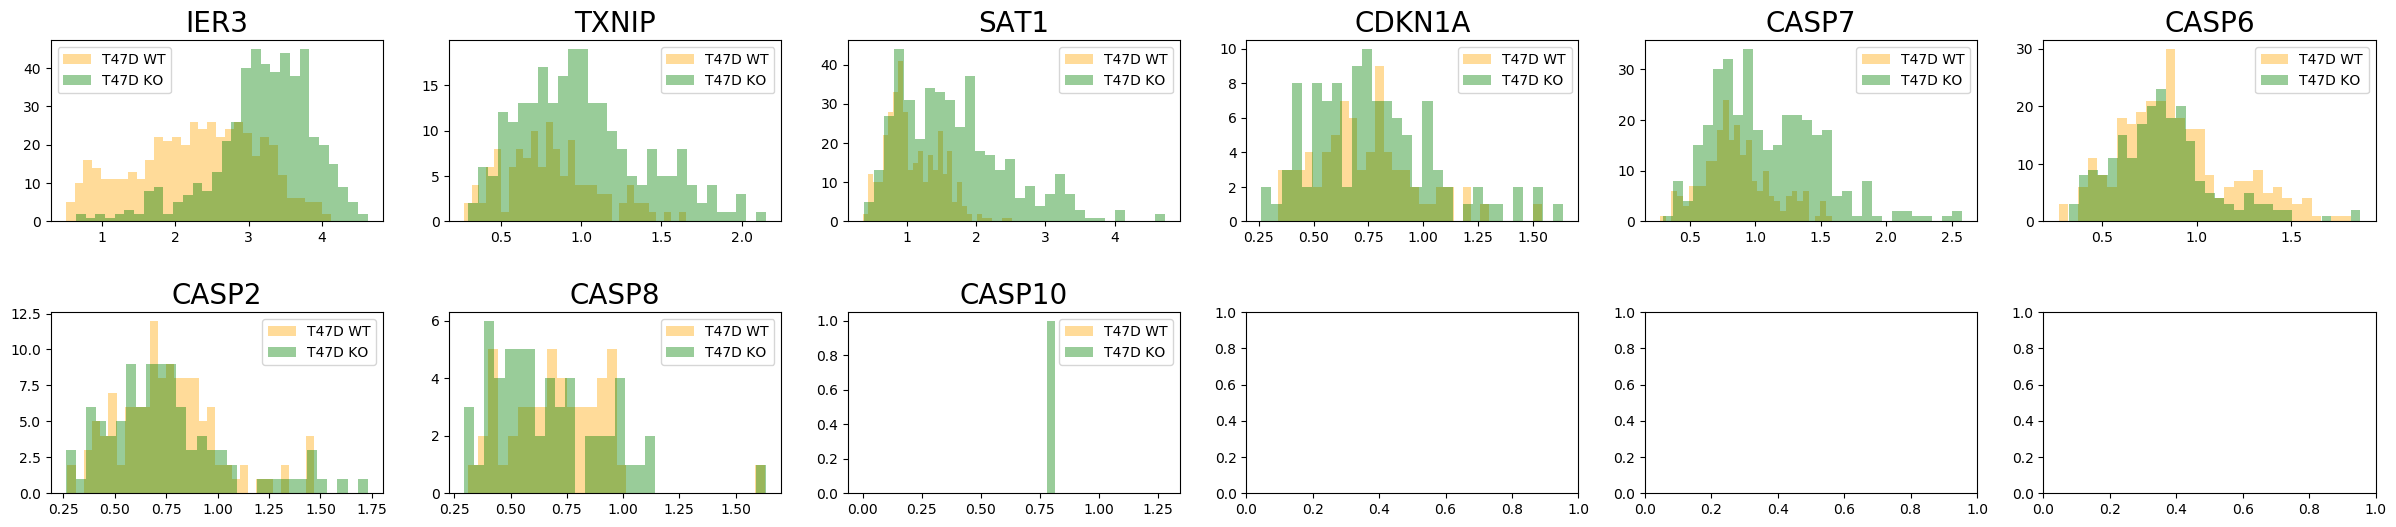

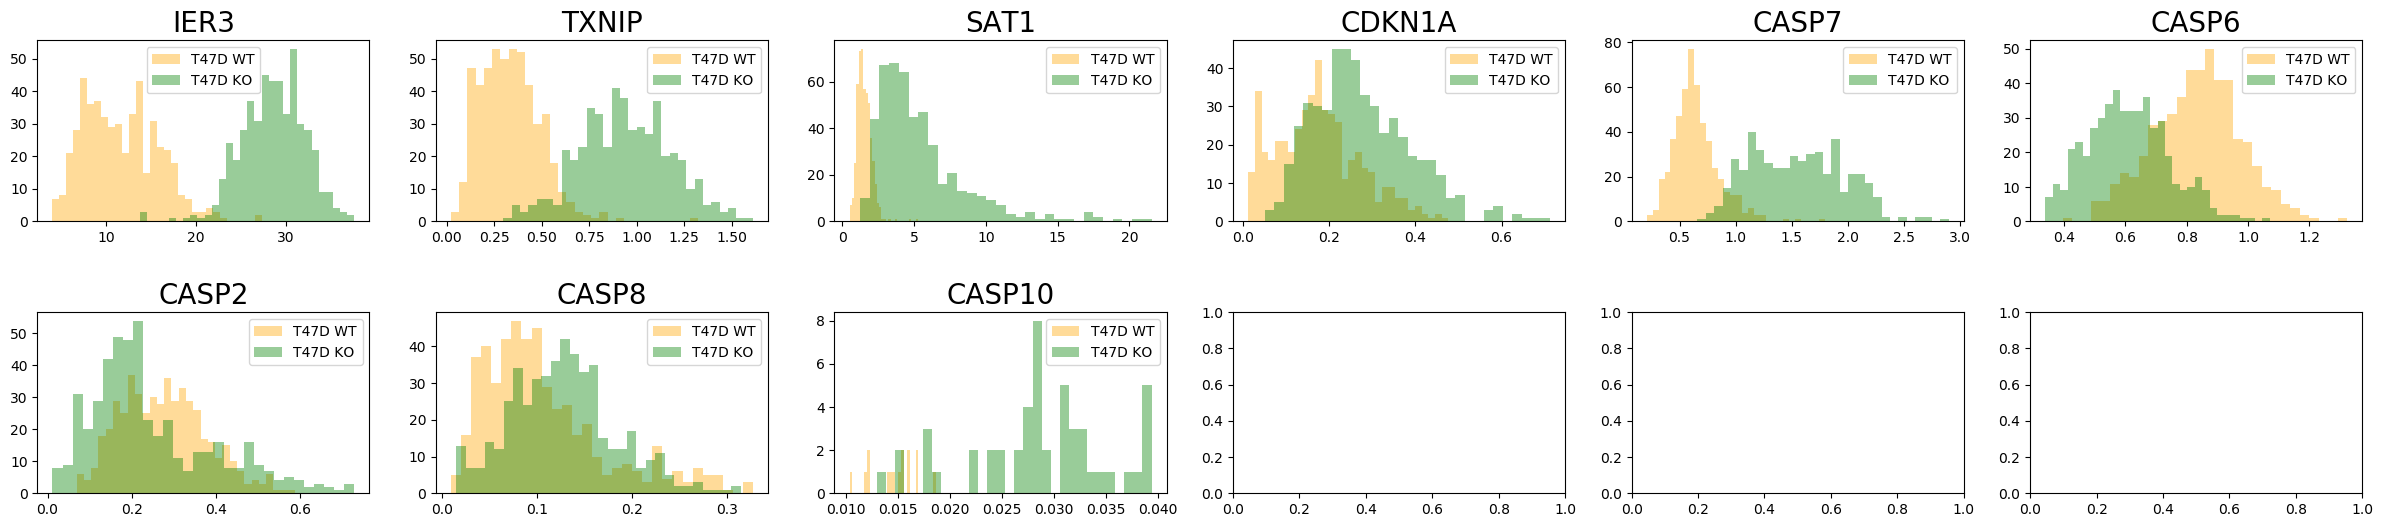

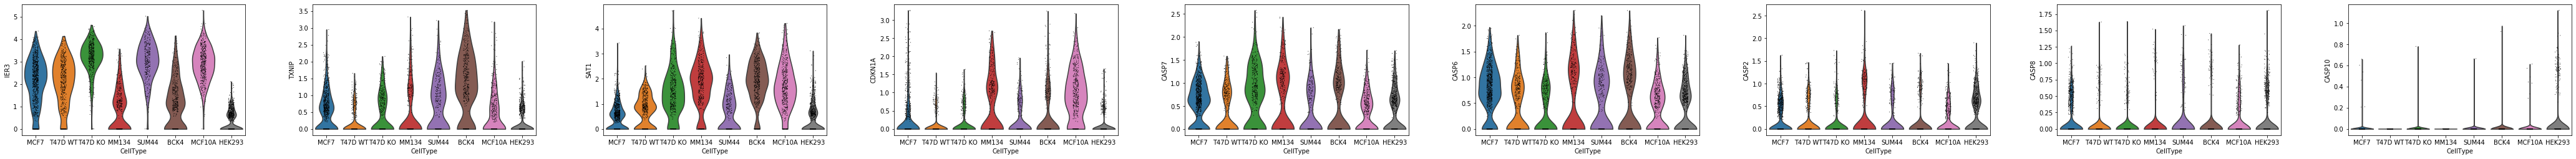

In [79]:
genes_sel = ['IER3','TXNIP','SAT1','CDKN1A','CASP7','CASP6','CASP2','CASP8','CASP10']

# X
nplots = len(genes_sel)
ncols = 6
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes_sel):
    
    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].X.toarray()
    ko_expr = ref_norm[cells_ko,gene].X.toarray()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)
    ax.legend()
    
# Ms    

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes_sel):
    
    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].layers['Ms'].toarray().flatten()
    ko_expr = ref_norm[cells_ko,gene].layers['Ms'].toarray().flatten()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)
    ax.legend()
    
# sc violin
sc.pl.violin(ref_norm, groupby='CellType', keys=[g for g in genes_sel if g in ref_norm.var_names], jitter=True, size=1, raw=True, multi_panel=True)

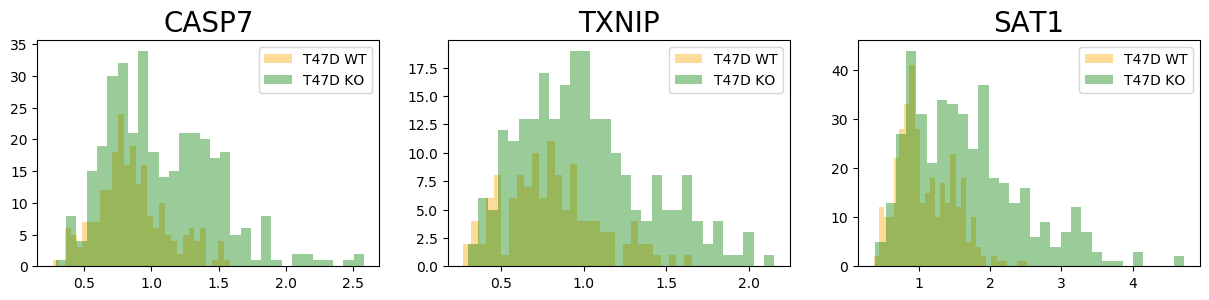

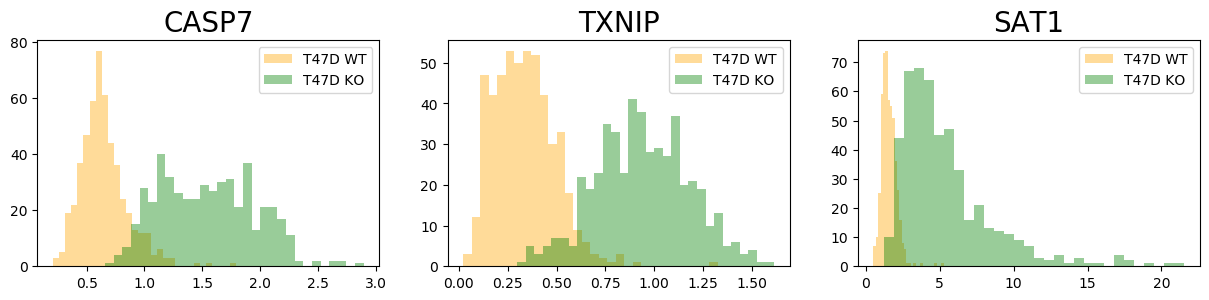

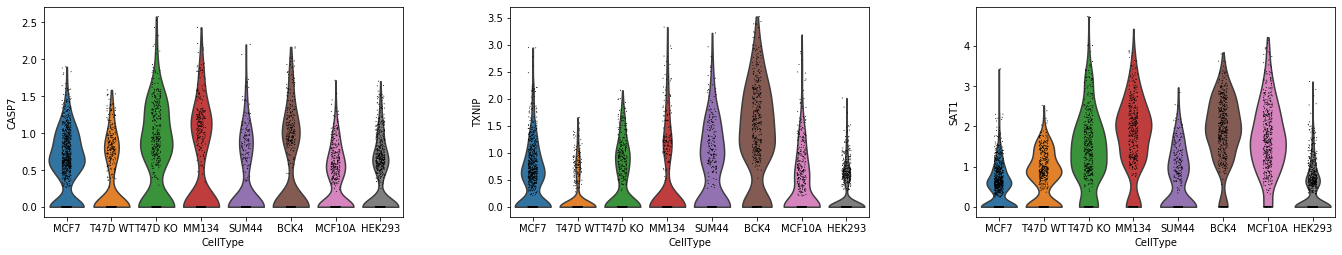

In [81]:
genes_sel = ['CASP7','TXNIP','SAT1']

# X
nplots = len(genes_sel)
ncols = 3
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes_sel):
    
    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].X.toarray()
    ko_expr = ref_norm[cells_ko,gene].X.toarray()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)
    ax.legend()
    
# Ms    

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes_sel):
    
    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].layers['Ms'].toarray().flatten()
    ko_expr = ref_norm[cells_ko,gene].layers['Ms'].toarray().flatten()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)
    ax.legend()
    
# sc violin
sc.pl.violin(ref_norm, groupby='CellType', keys=[g for g in genes_sel if g in ref_norm.var_names], jitter=True, size=1, raw=True, multi_panel=True)

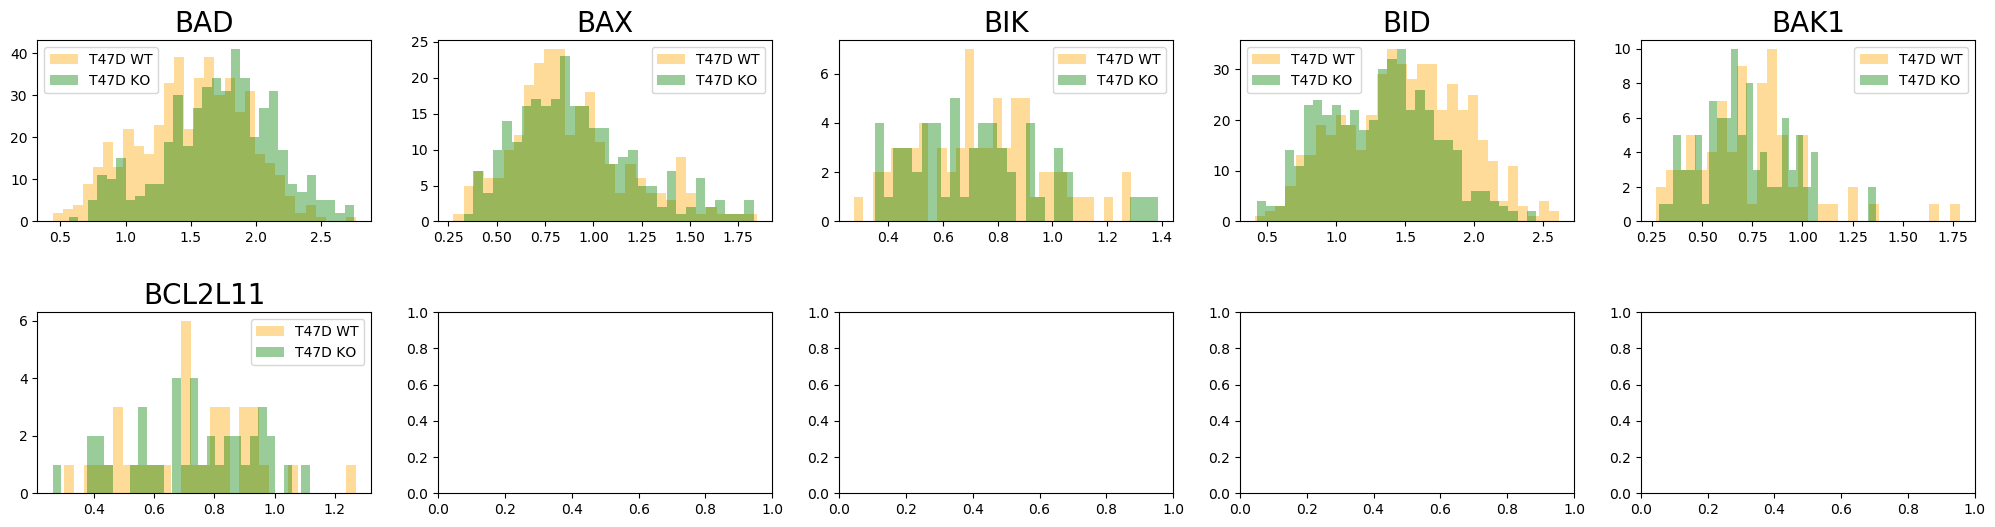

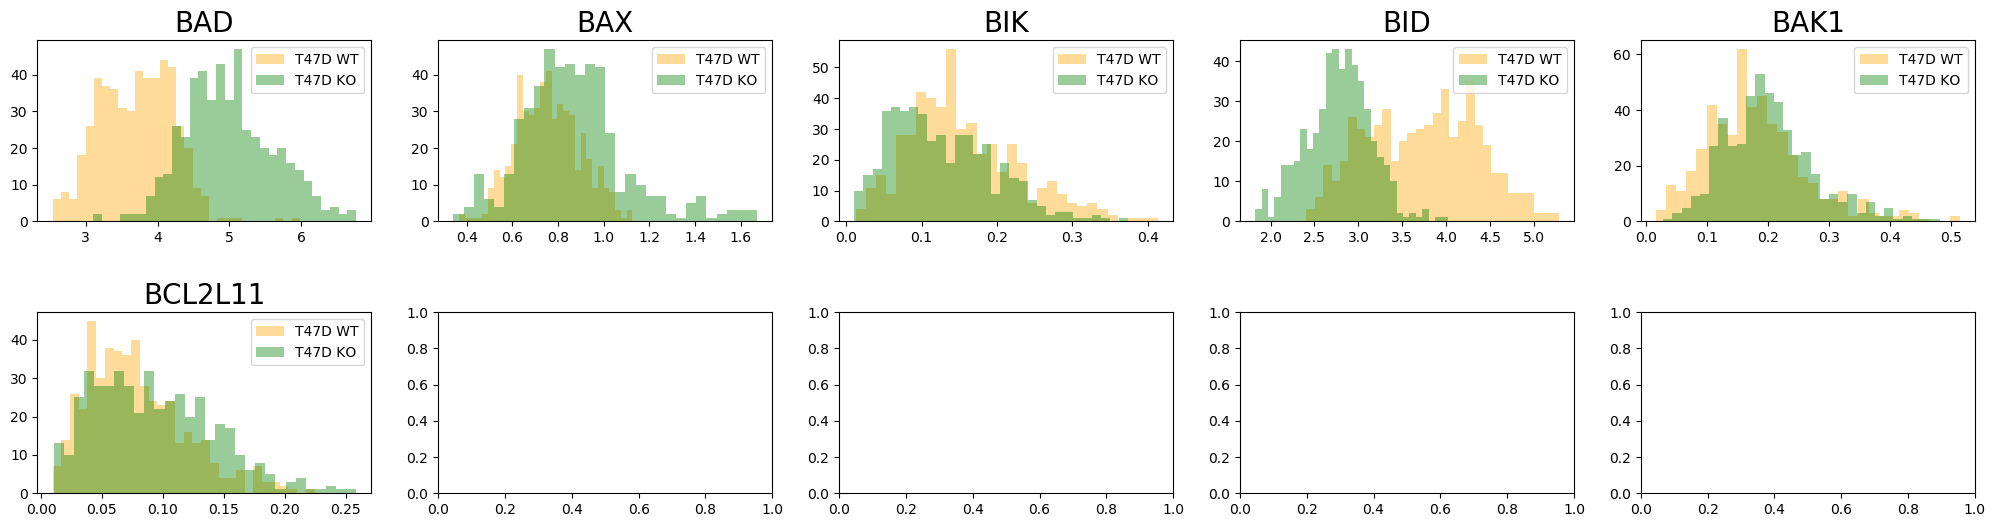

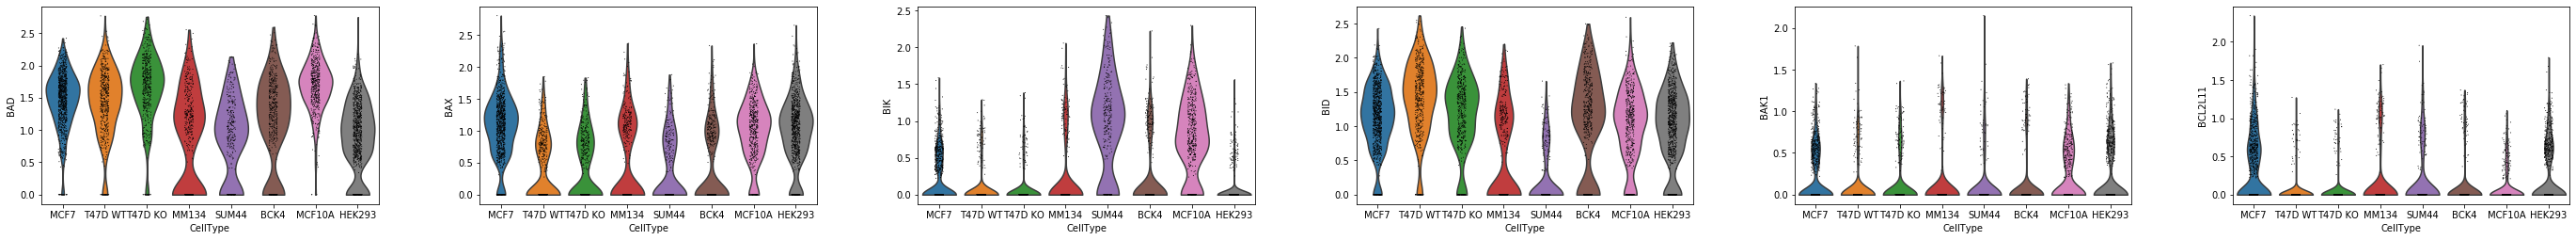

In [88]:
# pro apoptosis
genes_sel = ['BAD','BAX','BIK','BID','BAK1','BCL2L11']

# X
nplots = len(genes_sel)
ncols = 5
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes_sel):
    
    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].X.toarray()
    ko_expr = ref_norm[cells_ko,gene].X.toarray()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)
    ax.legend()
    
# Ms    

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes_sel):
    
    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].layers['Ms'].toarray().flatten()
    ko_expr = ref_norm[cells_ko,gene].layers['Ms'].toarray().flatten()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)
    ax.legend()
    
# sc violin
sc.pl.violin(ref_norm, groupby='CellType', keys=[g for g in genes_sel if g in ref_norm.var_names], jitter=True, size=1, raw=True, multi_panel=True)

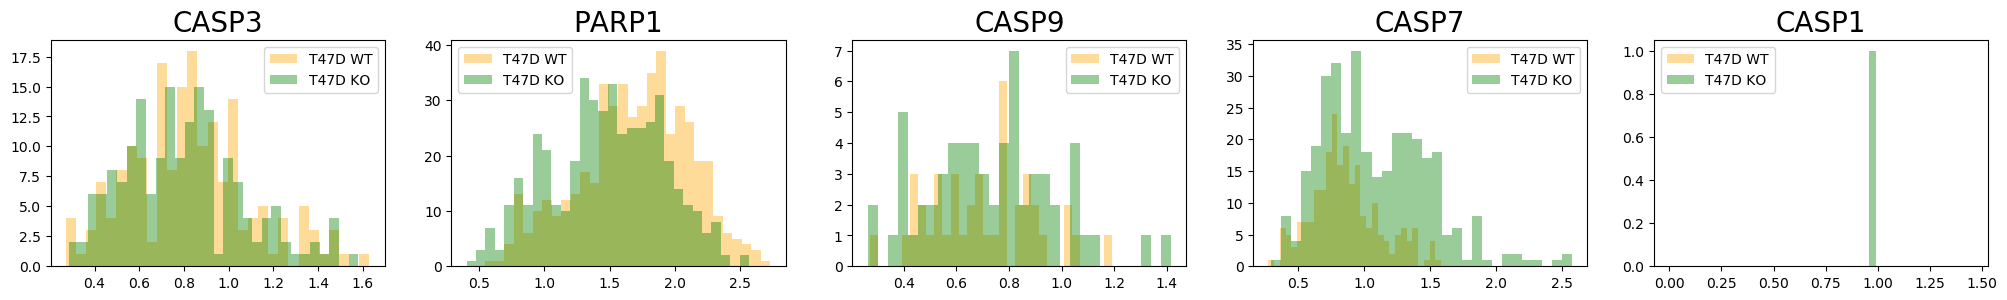

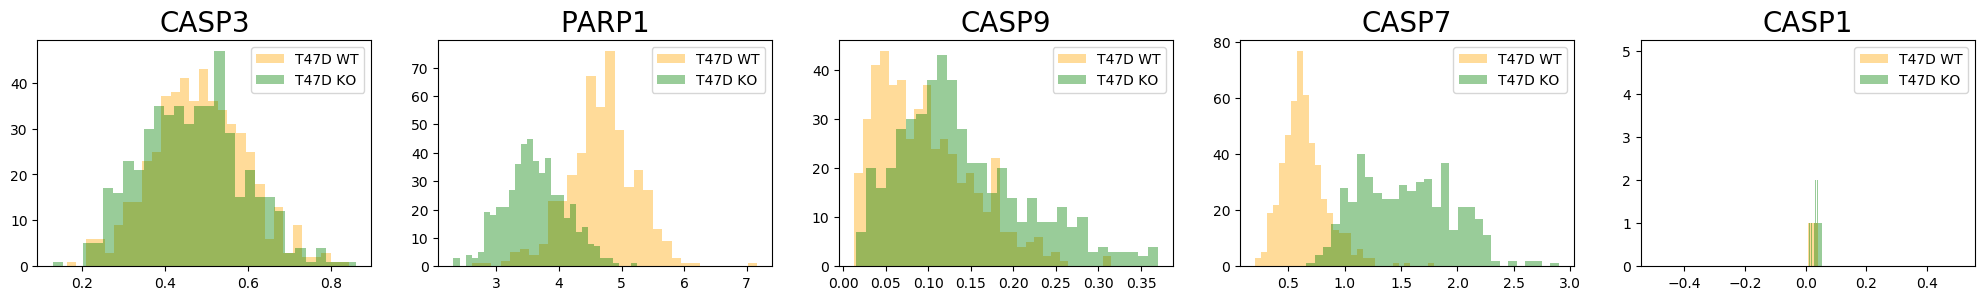

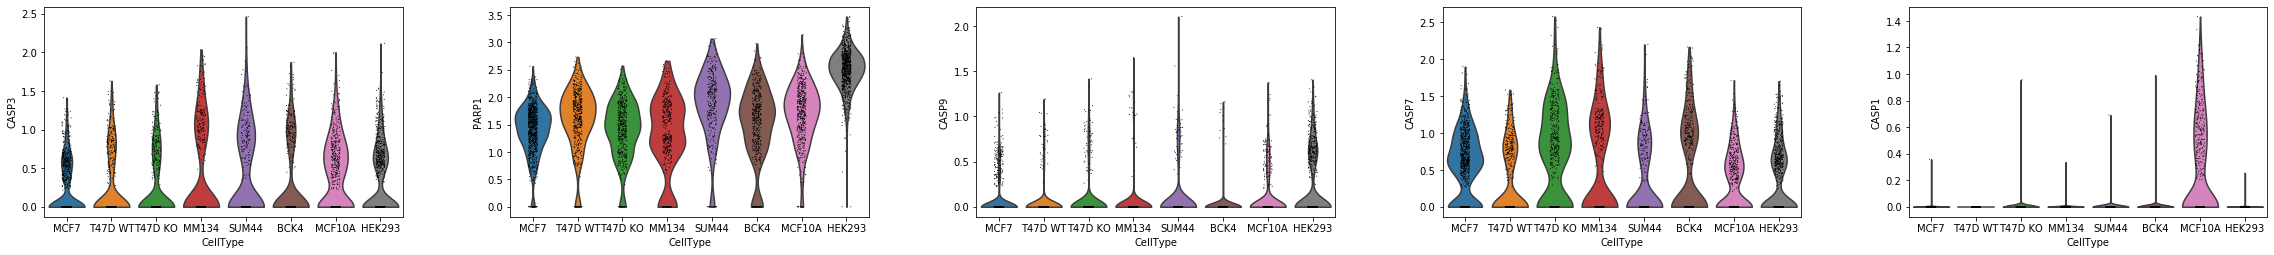

In [91]:
# apoptosis
genes_sel = ['CASP3','PARP1','CASP9','CASP7','CASP1']

# X
nplots = len(genes_sel)
ncols = 5
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes_sel):
    
    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].X.toarray()
    ko_expr = ref_norm[cells_ko,gene].X.toarray()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)
    ax.legend()
    
# Ms    

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes_sel):
    
    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].layers['Ms'].toarray().flatten()
    ko_expr = ref_norm[cells_ko,gene].layers['Ms'].toarray().flatten()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)
    ax.legend()
    
# sc violin
sc.pl.violin(ref_norm, groupby='CellType', keys=[g for g in genes_sel if g in ref_norm.var_names], jitter=True, size=1, raw=True, multi_panel=True)

## Regulon components

In [93]:
import pickle 

RegDict = pickle.load(open('../data/pySCENIC/RegulonDict.pkl', 'rb'))
RegDict

{'ATF1':              MCF7   T47D WT   T47D KO     MM134     SUM44  BCK4    MCF10A
 AAGAB    0.000000  0.434553  0.000000  0.000000  0.000000   0.0  0.926453
 AARS     0.000000  0.000000  0.000000  3.827496  0.000000   0.0  0.000000
 ABCF3    2.857924  3.045326  0.000000  0.000000  5.525161   0.0  0.000000
 ABHD11   0.000000  1.635761  0.000000  0.000000  0.000000   0.0  0.000000
 ABHD17A  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.374627
 ...           ...       ...       ...       ...       ...   ...       ...
 ZNRD1    0.000000  0.000000  0.696746  0.000000  0.000000   0.0  0.000000
 ZRANB2   0.000000  0.000000  2.290448  0.000000  0.000000   0.0  0.000000
 ZSCAN18  0.000000  0.000000  0.000000  2.240260  0.000000   0.0  0.000000
 ZSWIM8   0.000000  0.000000  2.630060  0.000000  0.000000   0.0  0.000000
 ZWILCH   1.388042  0.000000  0.497474  0.000000  0.000000   0.0  0.000000
 
 [1967 rows x 7 columns],
 'ATF3':           MCF7  T47D WT   T47D KO      MM134     SUM44 

In [94]:
sel = RegDict['IRF1'][['T47D WT','T47D KO']]
sel = sel[sel.sum(axis=1)>0]
sel

T47D WT   T47D KO
ACADS     2.052095  0.000000
ACTL10    3.416452  0.000000
ADAMTSL4  1.084448  0.000000
AHCY      0.000000  0.413952
ALG8      0.000000  0.427368
...            ...       ...
ZNF784    1.532026  0.000000
ZNF846    2.854218  0.000000
ZNF865    2.246361  0.000000
ZNFX1     2.246361  0.000000
ZSWIM6    3.416452  0.000000

[239 rows x 2 columns]

In [132]:
sel[sel['T47D WT'] * sel['T47D KO']>0]


T47D WT   T47D KO
IRF1   2.854218  2.155142
SYCE3  1.369613  0.454200

In [133]:
sel[sel['T47D WT']>0]

T47D WT  T47D KO
ACADS     2.052095      0.0
ACTL10    3.416452      0.0
ADAMTSL4  1.084448      0.0
ANKRD1    0.190093      0.0
ARHGEF25  1.299375      0.0
...            ...      ...
ZNF784    1.532026      0.0
ZNF846    2.854218      0.0
ZNF865    2.246361      0.0
ZNFX1     2.246361      0.0
ZSWIM6    3.416452      0.0

[157 rows x 2 columns]

In [95]:
sel.T

ACADS    ACTL10  ADAMTSL4      AHCY      ALG8    ANKRD1  ARHGEF25  \
T47D WT  2.052095  3.416452  1.084448  0.000000  0.000000  0.190093  1.299375   
T47D KO  0.000000  0.000000  0.000000  0.413952  0.427368  0.000000  0.000000   

         ARHGEF37    ARID5A    BCAP31  ...     YPEL5   ZDHHC13      ZER1  \
T47D WT  2.370927  1.388636  2.370927  ...  0.000000  2.346381  0.000000   
T47D KO  0.000000  0.000000  0.000000  ...  2.044464  0.000000  3.049243   

           ZNF384    ZNF511    ZNF784    ZNF846    ZNF865     ZNFX1    ZSWIM6  
T47D WT  1.407059  2.171681  1.532026  2.854218  2.246361  2.246361  3.416452  
T47D KO  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[2 rows x 239 columns]

In [193]:
sel[sel['T47D KO']>0].index

Index(['AHCY', 'ALG8', 'BMP4', 'BRD7', 'C1GALT1', 'CARS2', 'CD63', 'CD81',
       'CSNK1D', 'CYB5R1', 'DMWD', 'DNMT3A', 'DNPEP', 'E2F8', 'ENPP5', 'EPHA2',
       'EVI2A', 'FAM160A1', 'FAM161A', 'FARP1', 'FBXO41', 'FH', 'FUCA2',
       'GALNT3', 'GPBP1', 'HAUS8', 'HCCS', 'HEXIM2', 'HOXB3', 'HSPBP1', 'IQCG',
       'IRF1', 'IRF2BP1', 'ISOC2', 'JUNB', 'KLF5', 'KMT2A', 'LIN52',
       'LINC00397', 'MCL1', 'MDM1', 'MORC3', 'MROH6', 'MXD4', 'NDUFS8', 'NME7',
       'OLFM2', 'PAX2', 'PDS5B', 'PEA15', 'PHF2', 'PLCE1', 'PLD3', 'POLR1D',
       'PTDSS2', 'RAB8A', 'RERE', 'RIMKLB', 'RND3', 'RNF213', 'RORA', 'SARAF',
       'SCAF1', 'SEMA3B', 'SETD3', 'SIAE', 'SLC38A10', 'SLC41A1', 'SLC9A5',
       'SMARCA2', 'SMARCAD1', 'SMARCD3', 'SPECC1', 'STRADB', 'SYCE3',
       'TBC1D17', 'TMEM218', 'TNF', 'TRIM45', 'VEGFA', 'VMA21', 'YDJC',
       'YPEL5', 'ZER1'],
      dtype='object')

In [197]:
!mkdir ../data/ExpTmp

In [208]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)
desc = gp.convert(organism='hsapiens',
            query=list(sel[sel['T47D KO']>0].index),
            )[['incoming','description']]

desc.loc[:,'weight'] = sel[sel['T47D KO']>0]['T47D KO'].values
desc = desc.sort_values('weight', ascending=False)
desc.to_csv('../data/ExpTmp/desc.csv')

In [27]:
desc = pd.read_csv('../data/ExpTmp/desc.csv',index_col=0).reset_index(drop=True)
desc

incoming                                        description    weight
0       MCL1  MCL1 apoptosis regulator, BCL2 family member [...  6.328070
1      LIN52  lin-52 DREAM MuvB core complex component [Sour...  6.328070
2    FAM161A  FAM161 centrosomal protein A [Source:HGNC Symb...  6.328070
3       RND3  Rho family GTPase 3 [Source:HGNC Symbol;Acc:HG...  6.328070
4   SMARCAD1  SWI/SNF-related, matrix-associated actin-depen...  6.328070
..       ...                                                ...       ...
79      ALG8  ALG8 alpha-1,3-glucosyltransferase [Source:HGN...  0.427368
80    CYB5R1  cytochrome b5 reductase 1 [Source:HGNC Symbol;...  0.421834
81      CD81   CD81 molecule [Source:HGNC Symbol;Acc:HGNC:1701]  0.418219
82      AHCY  adenosylhomocysteinase [Source:HGNC Symbol;Acc...  0.413952
83  SLC38A10  solute carrier family 38 member 10 [Source:HGN...  0.408411

[84 rows x 3 columns]

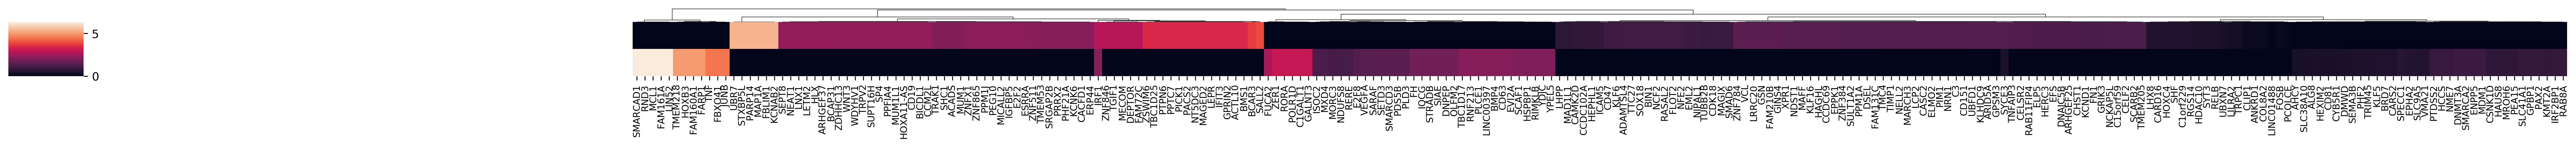

In [53]:
mpl.rc('figure', dpi=300)

g = sns.clustermap(sel.T, figsize=(30, 2), method='ward', metric='euclidean', 
                   row_cluster=False)

xlabels = sel.index[np.array(g.dendrogram_col.reordered_ind)]
g.ax_heatmap.set_xticks([x+0.5 for x in range(len(xlabels))])
g.ax_heatmap.set_xticklabels(xlabels, rotation=90, fontsize=8)

g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_yticklabels('')

cbar = g.cax
x0,y0,x1,y1 = np.array(g.ax_heatmap.get_position()).flatten()
cbar.set_position([-0.05, y0, 0.03, y1-y0])



In [28]:
sel_norm = ref_norm[:,desc['incoming'].values]
cells_wt = meta.index[meta['CellType']=="T47D WT"]
cells_ko = meta.index[meta['CellType']=="T47D KO"]

sel_norm

View of AnnData object with n_obs × n_vars = 4614 × 84 
    obs: 'Clusters', '_X', '_Y', 'doublet_bln', 'doublet_score', 'percent_mito', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'CellType'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced'

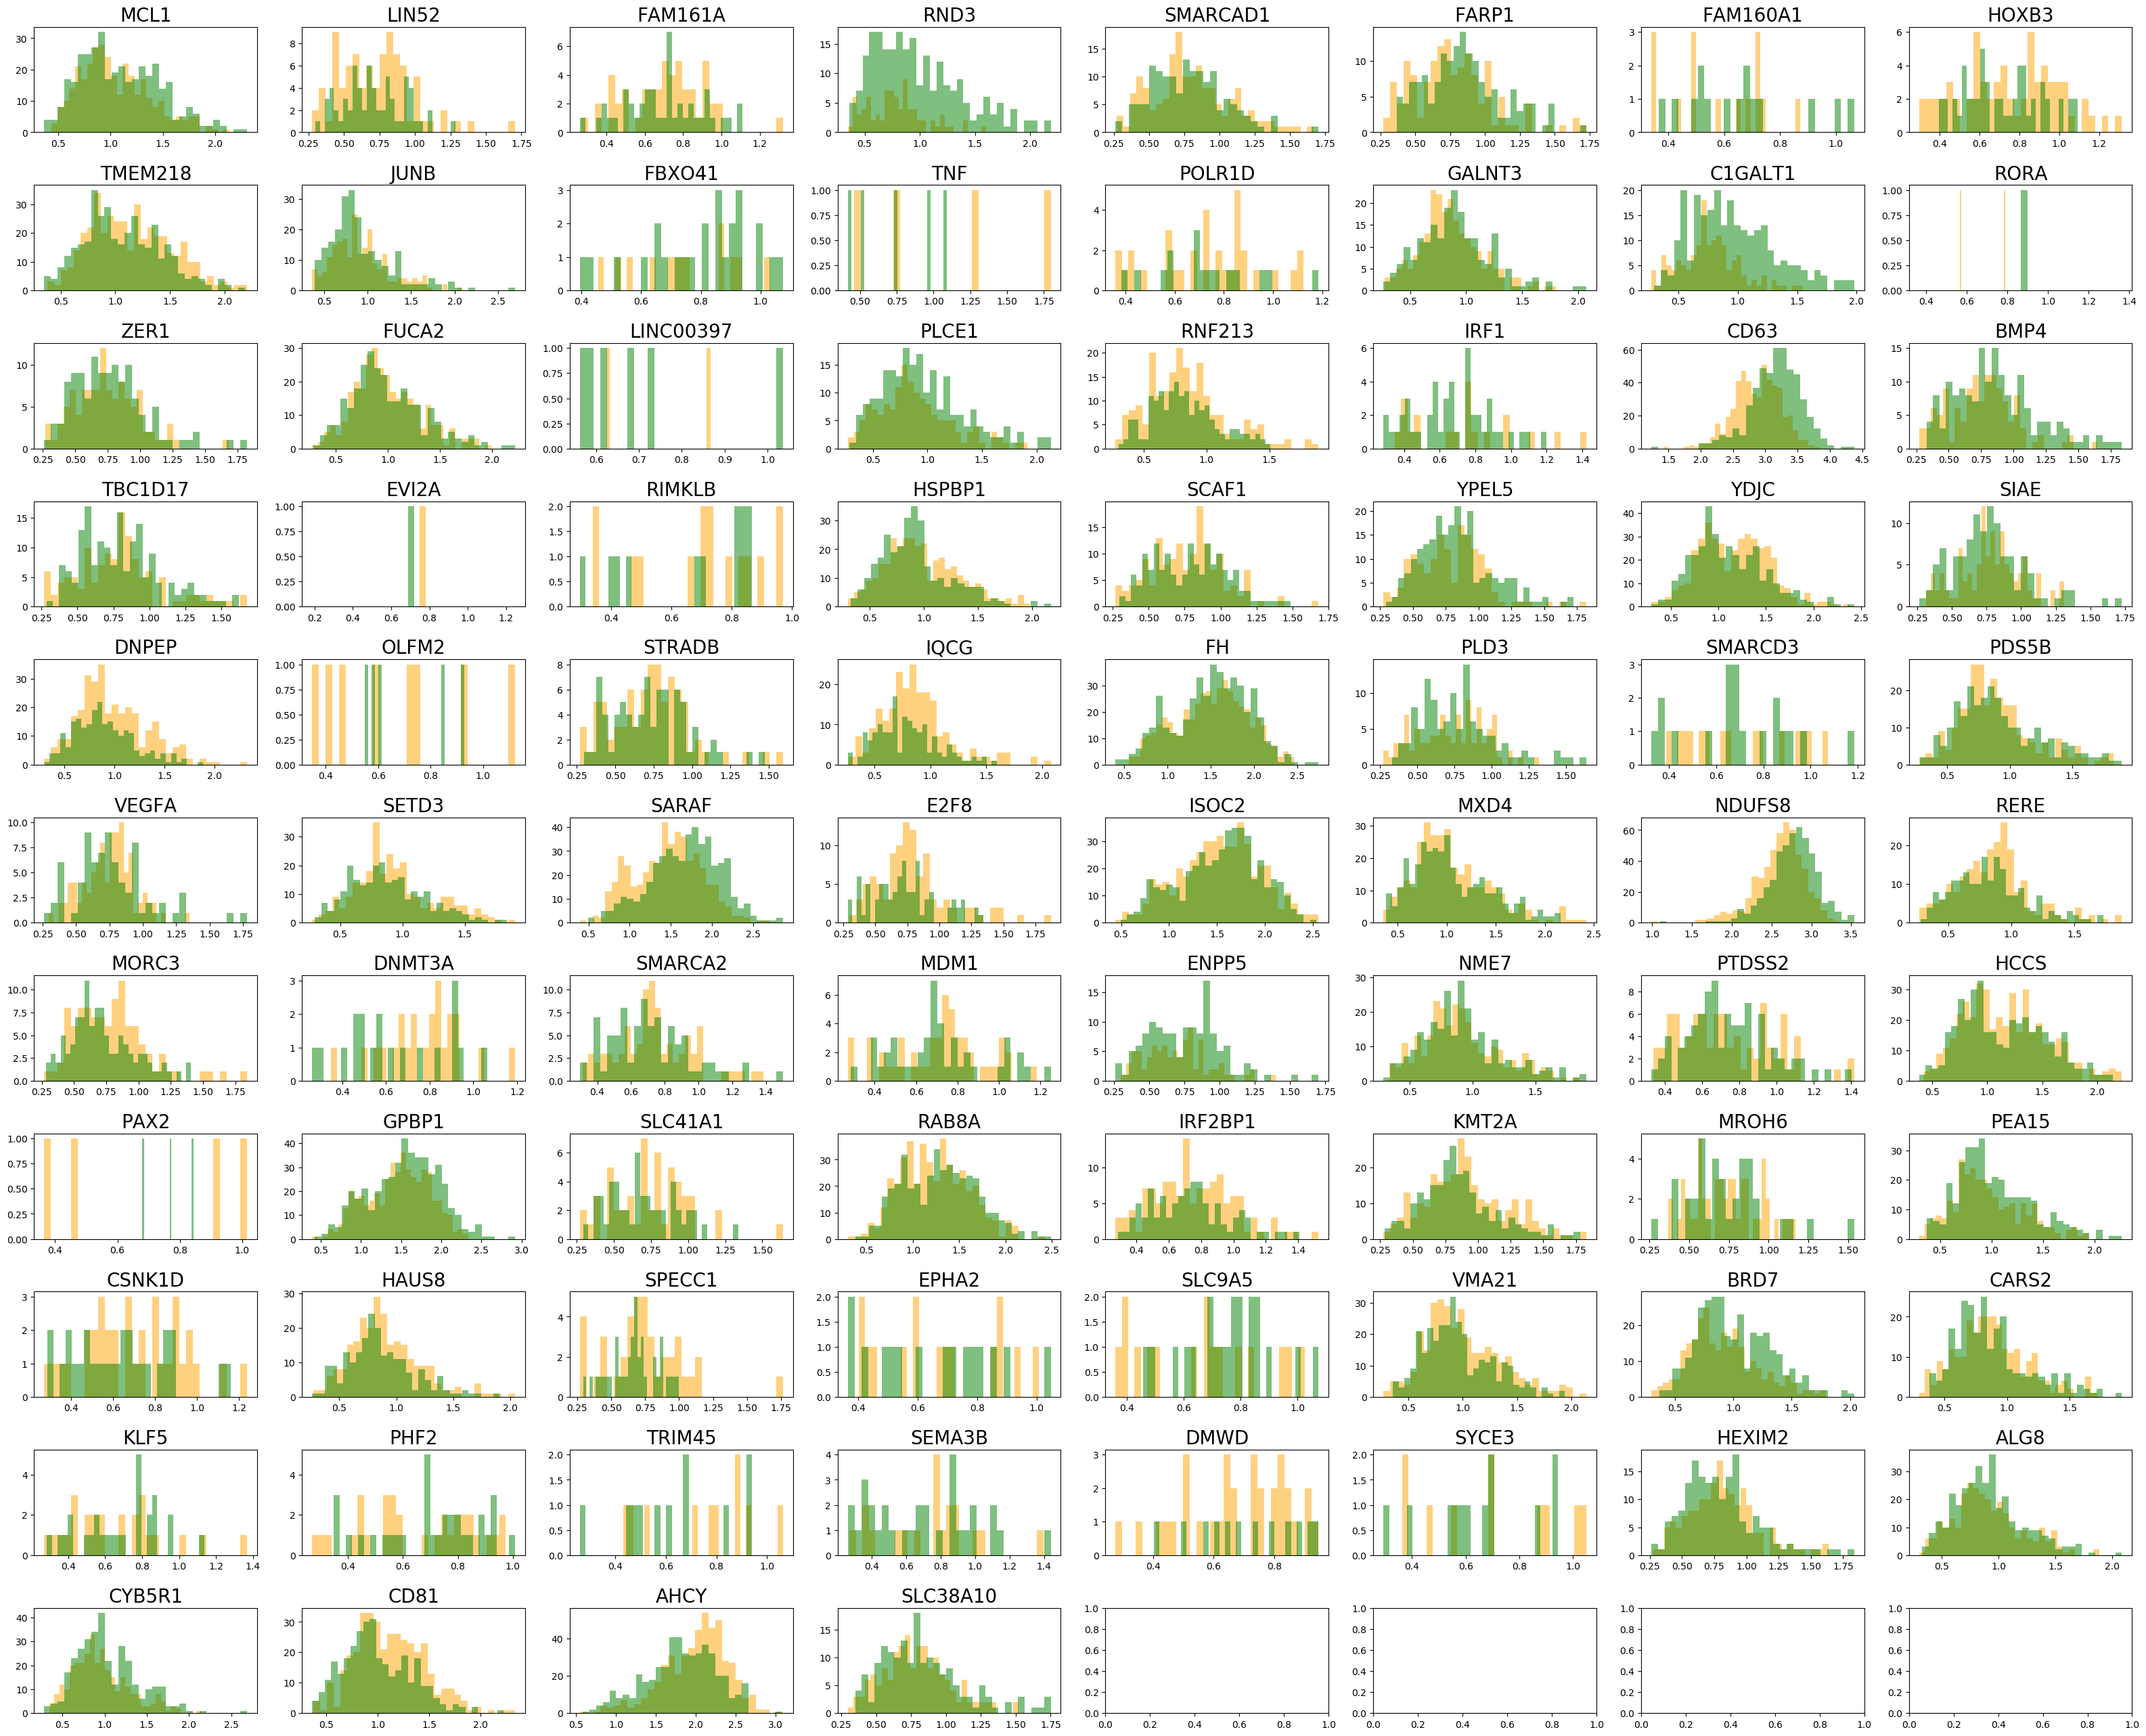

In [217]:
genes = list(sel_norm.var_names)

nplots = len(genes)
ncols = 8
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes):

    ax = axes_list[n]
    wt_expr = sel_norm[cells_wt,gene].X.toarray()
    ko_expr = sel_norm[cells_ko,gene].X.toarray()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.5,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.5,label='T47D KO')
    ax.set_title(gene, fontsize=20)

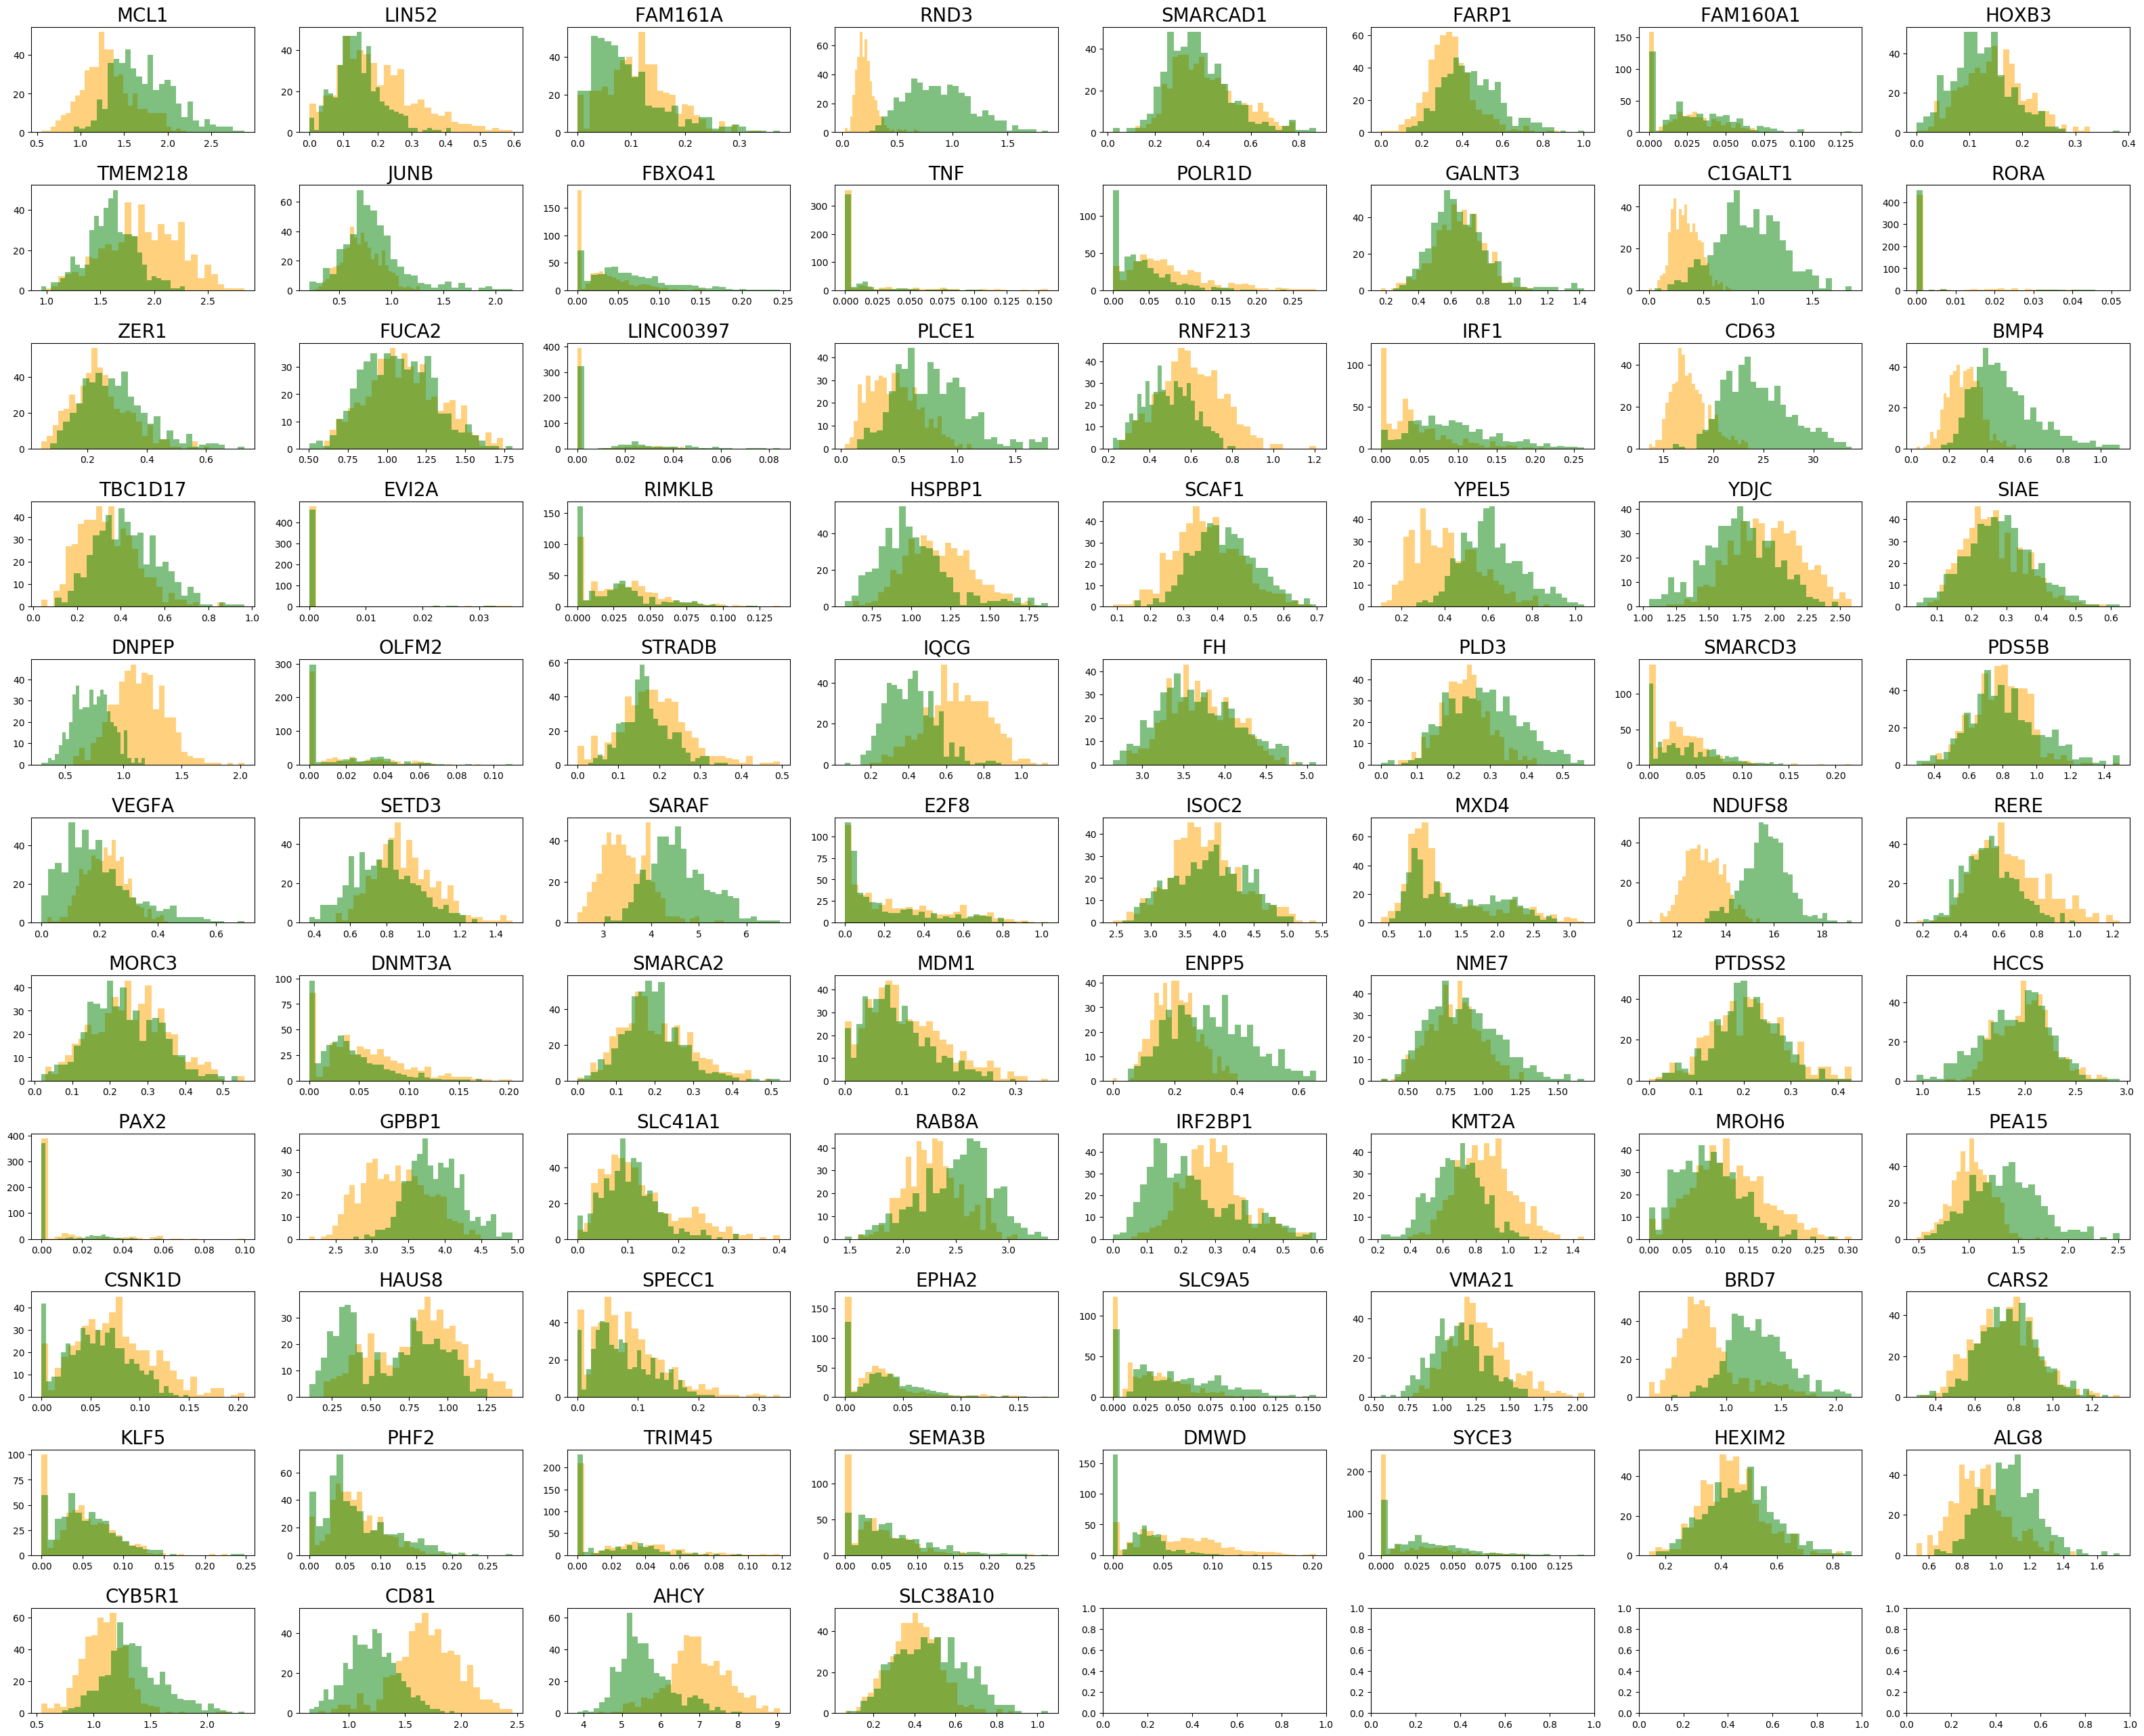

In [216]:
genes = list(sel_norm.var_names)

nplots = len(genes)
ncols = 8
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes):

    ax = axes_list[n]
    wt_expr = sel_norm[cells_wt,gene].layers['Ms'].toarray().flatten()
    ko_expr = sel_norm[cells_ko,gene].layers['Ms'].toarray().flatten()
    ax.hist(wt_expr, bins=30, color='orange', alpha=.5,label='T47D WT')
    ax.hist(ko_expr, bins=30, color='green', alpha=.5,label='T47D KO')
    ax.set_title(gene, fontsize=20)

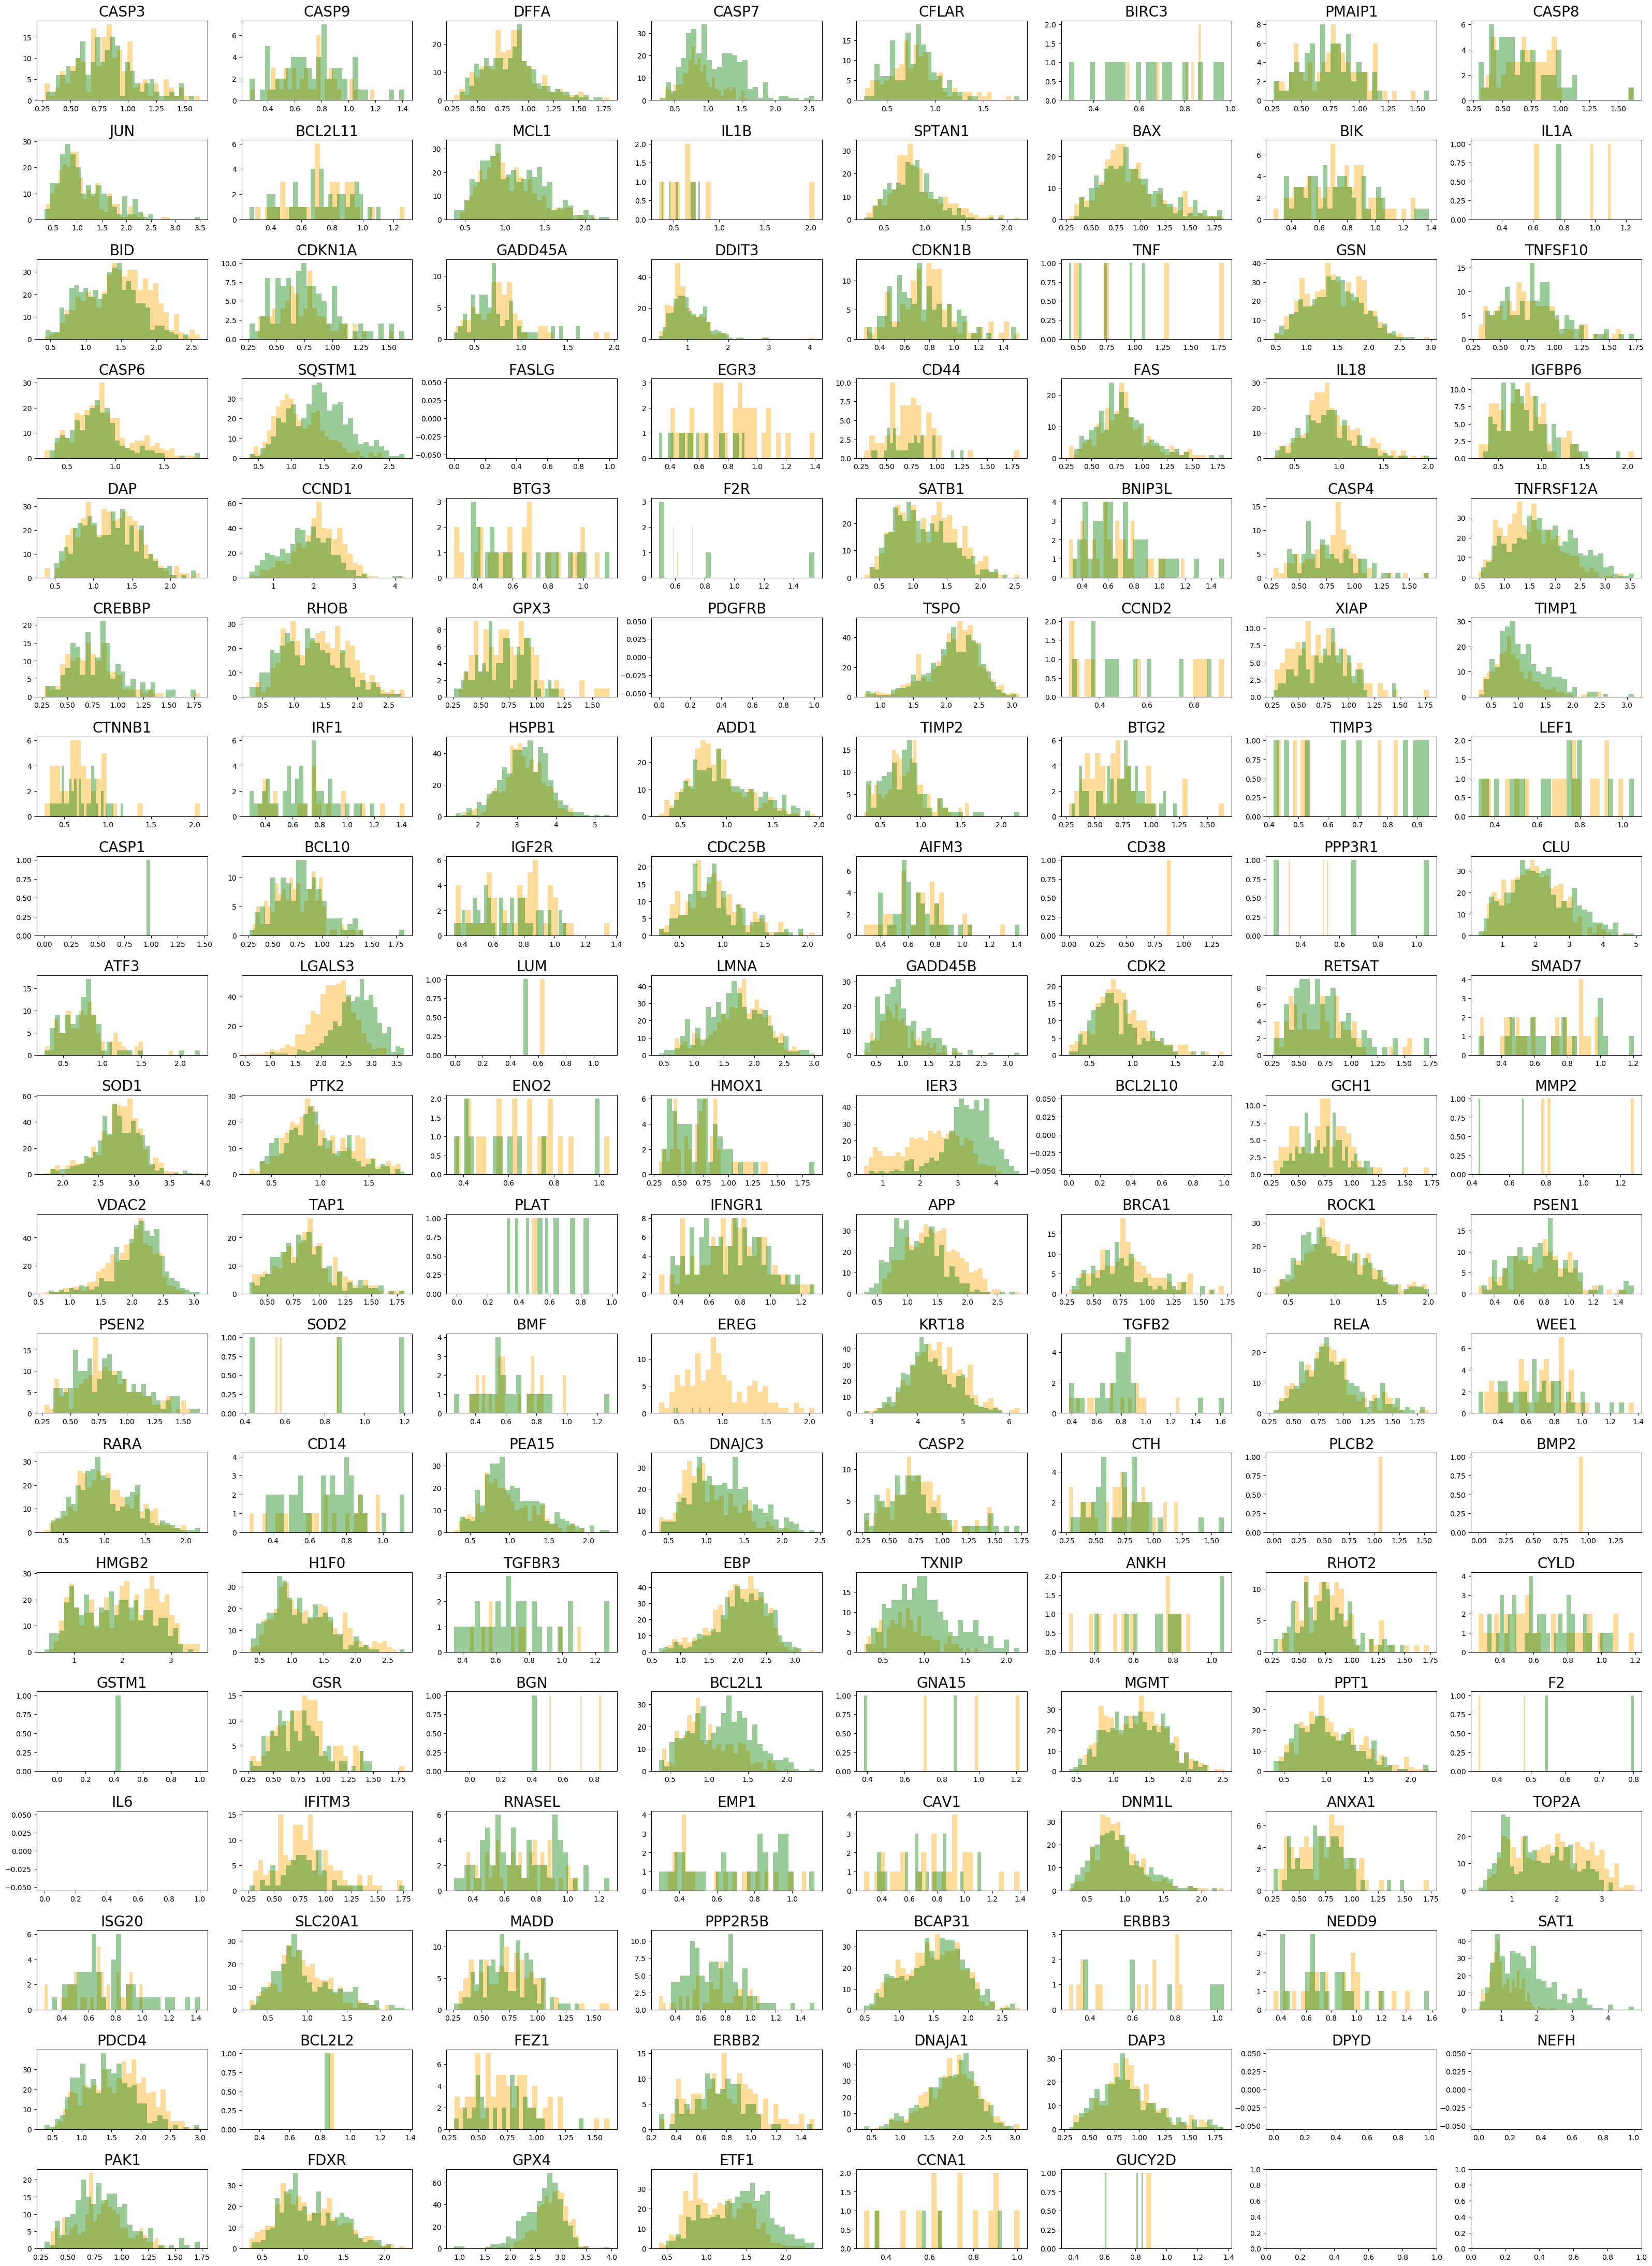

In [244]:
gmt = read_gmt('../data/GSVA/h.all.v6.2.symbols.gmt')
genes = [g for g in gmt['HALLMARK_APOPTOSIS'.lower()] if g in ref_norm.var_names]

nplots = len(genes)
ncols = 8
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes):

    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].X.toarray()
    ko_expr = ref_norm[cells_ko,gene].X.toarray()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)

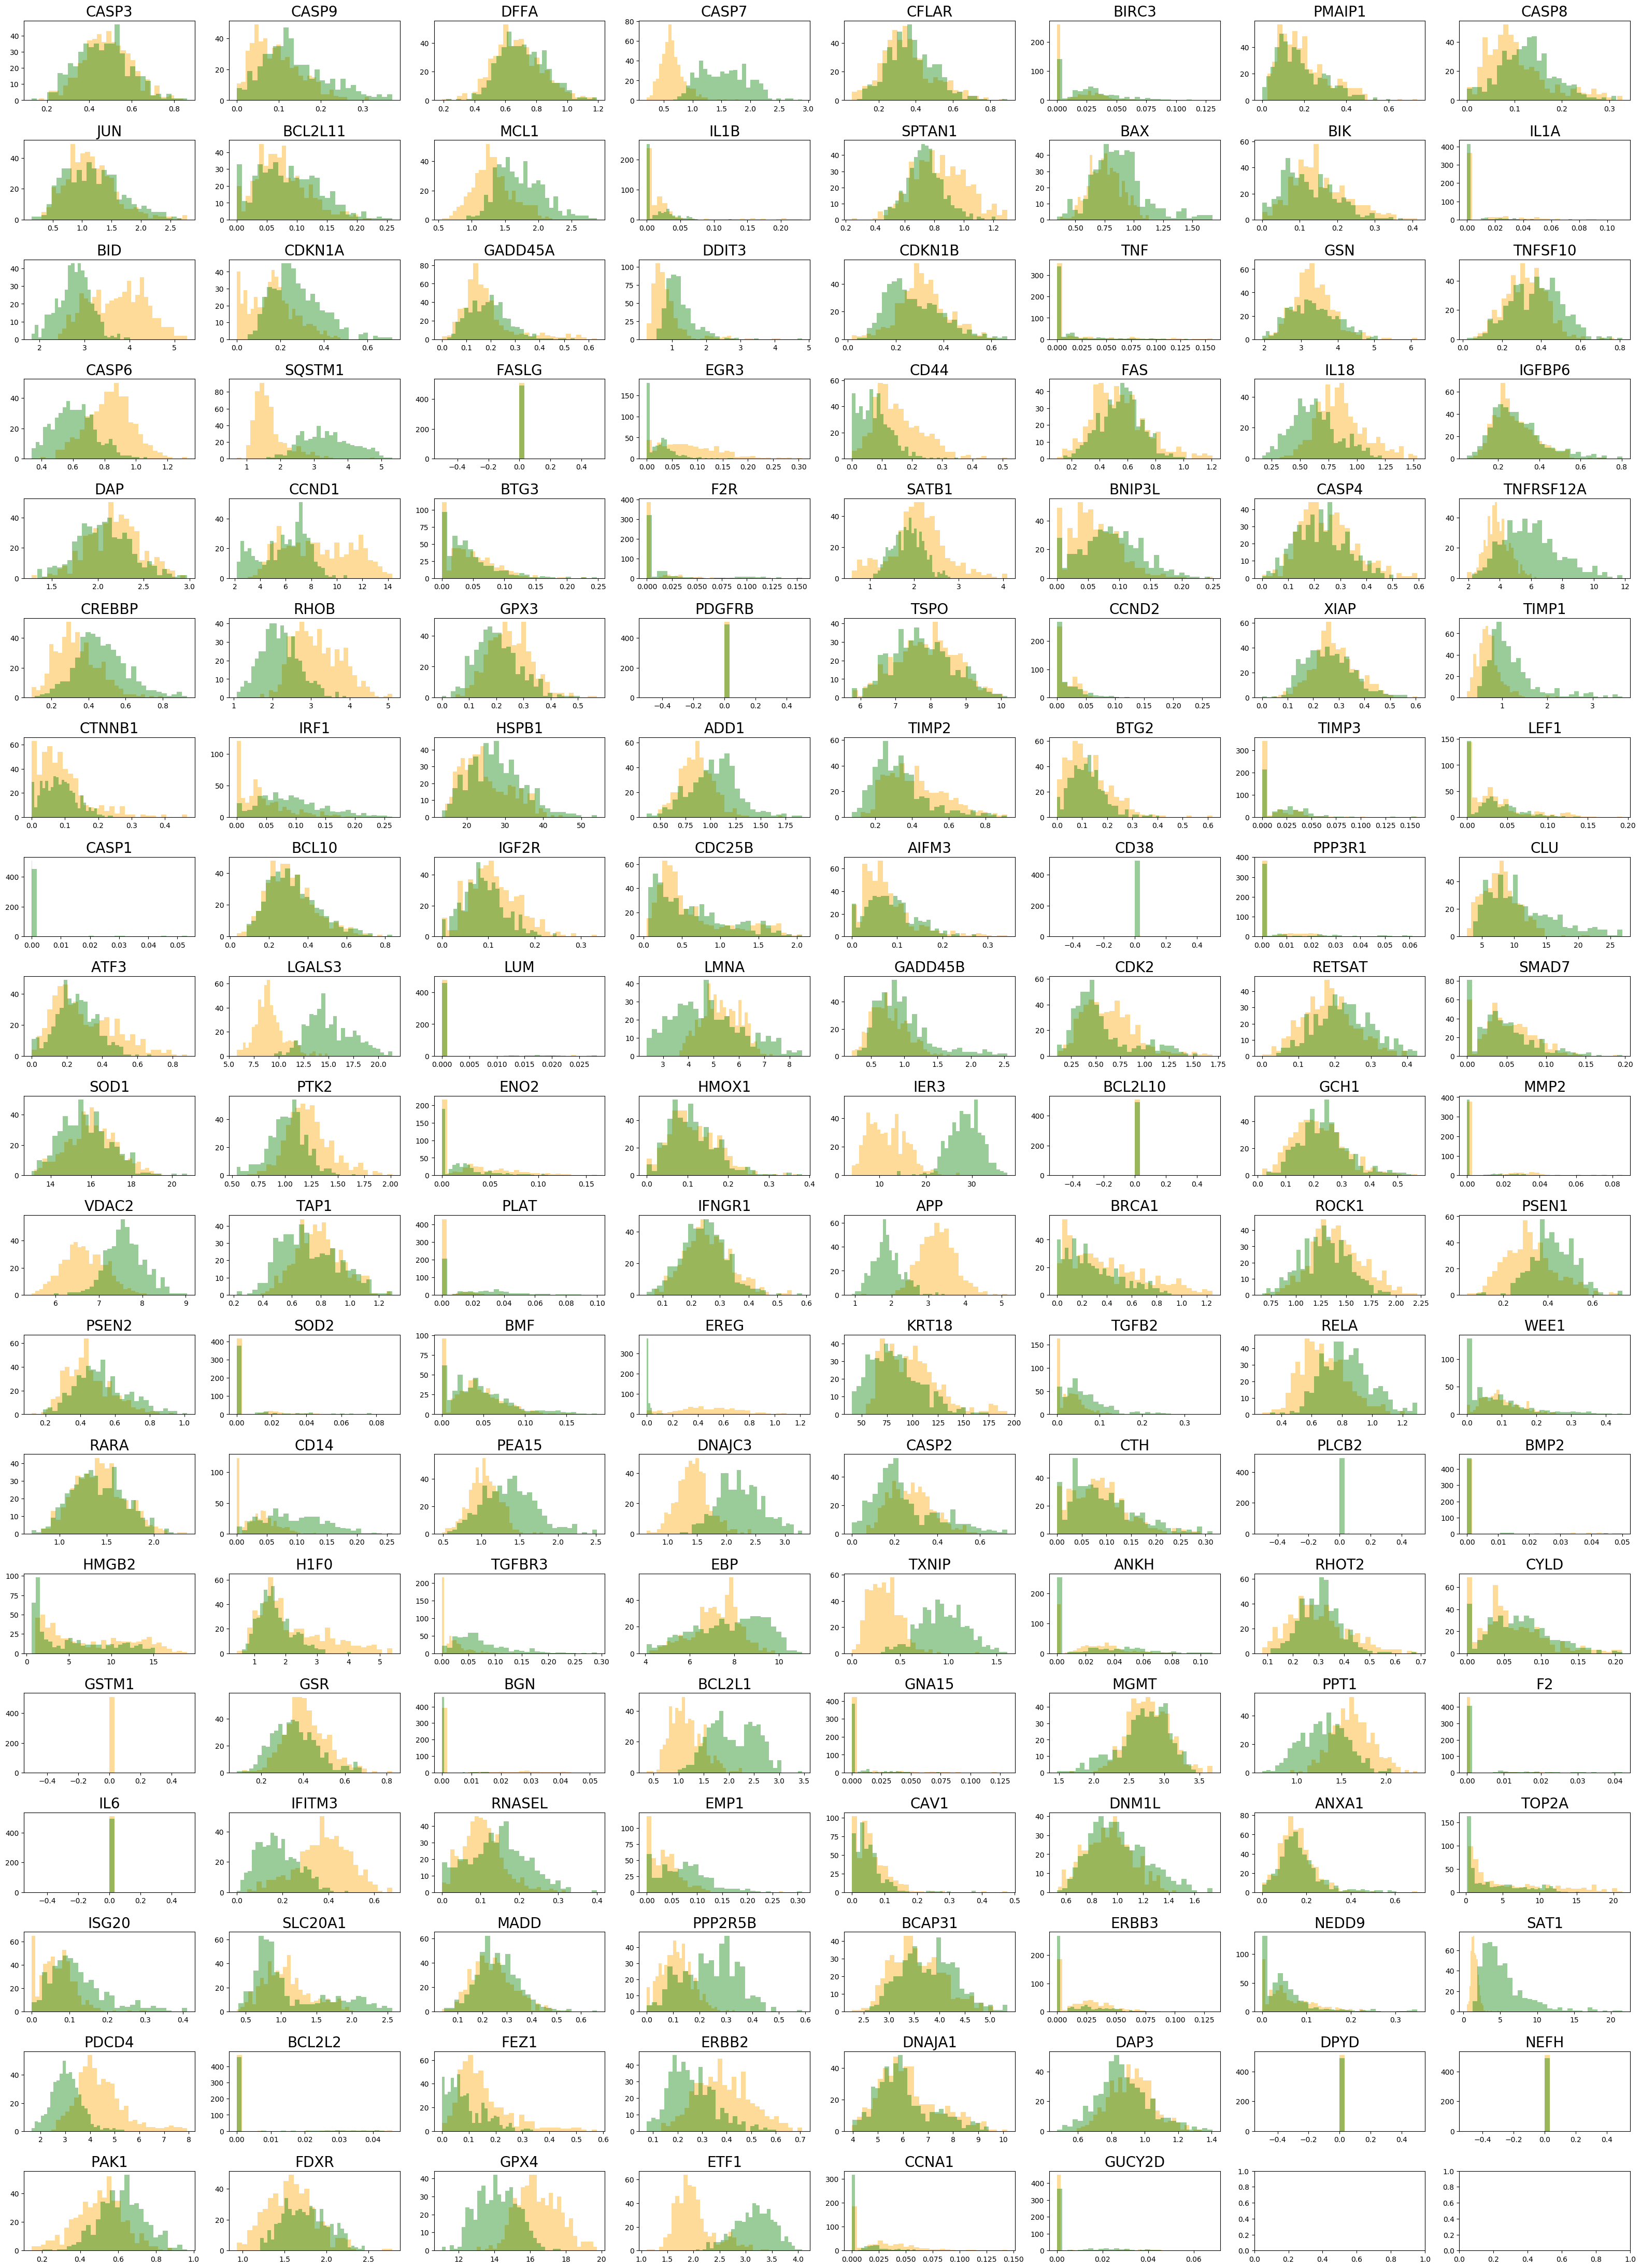

In [243]:
gmt = read_gmt('../data/GSVA/h.all.v6.2.symbols.gmt')
genes = [g for g in gmt['HALLMARK_APOPTOSIS'.lower()] if g in ref_norm.var_names]

nplots = len(genes)
ncols = 8
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes):

    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].layers['Ms'].toarray().flatten()
    ko_expr = ref_norm[cells_ko,gene].layers['Ms'].toarray().flatten()
    ax.hist(wt_expr, bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr, bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)

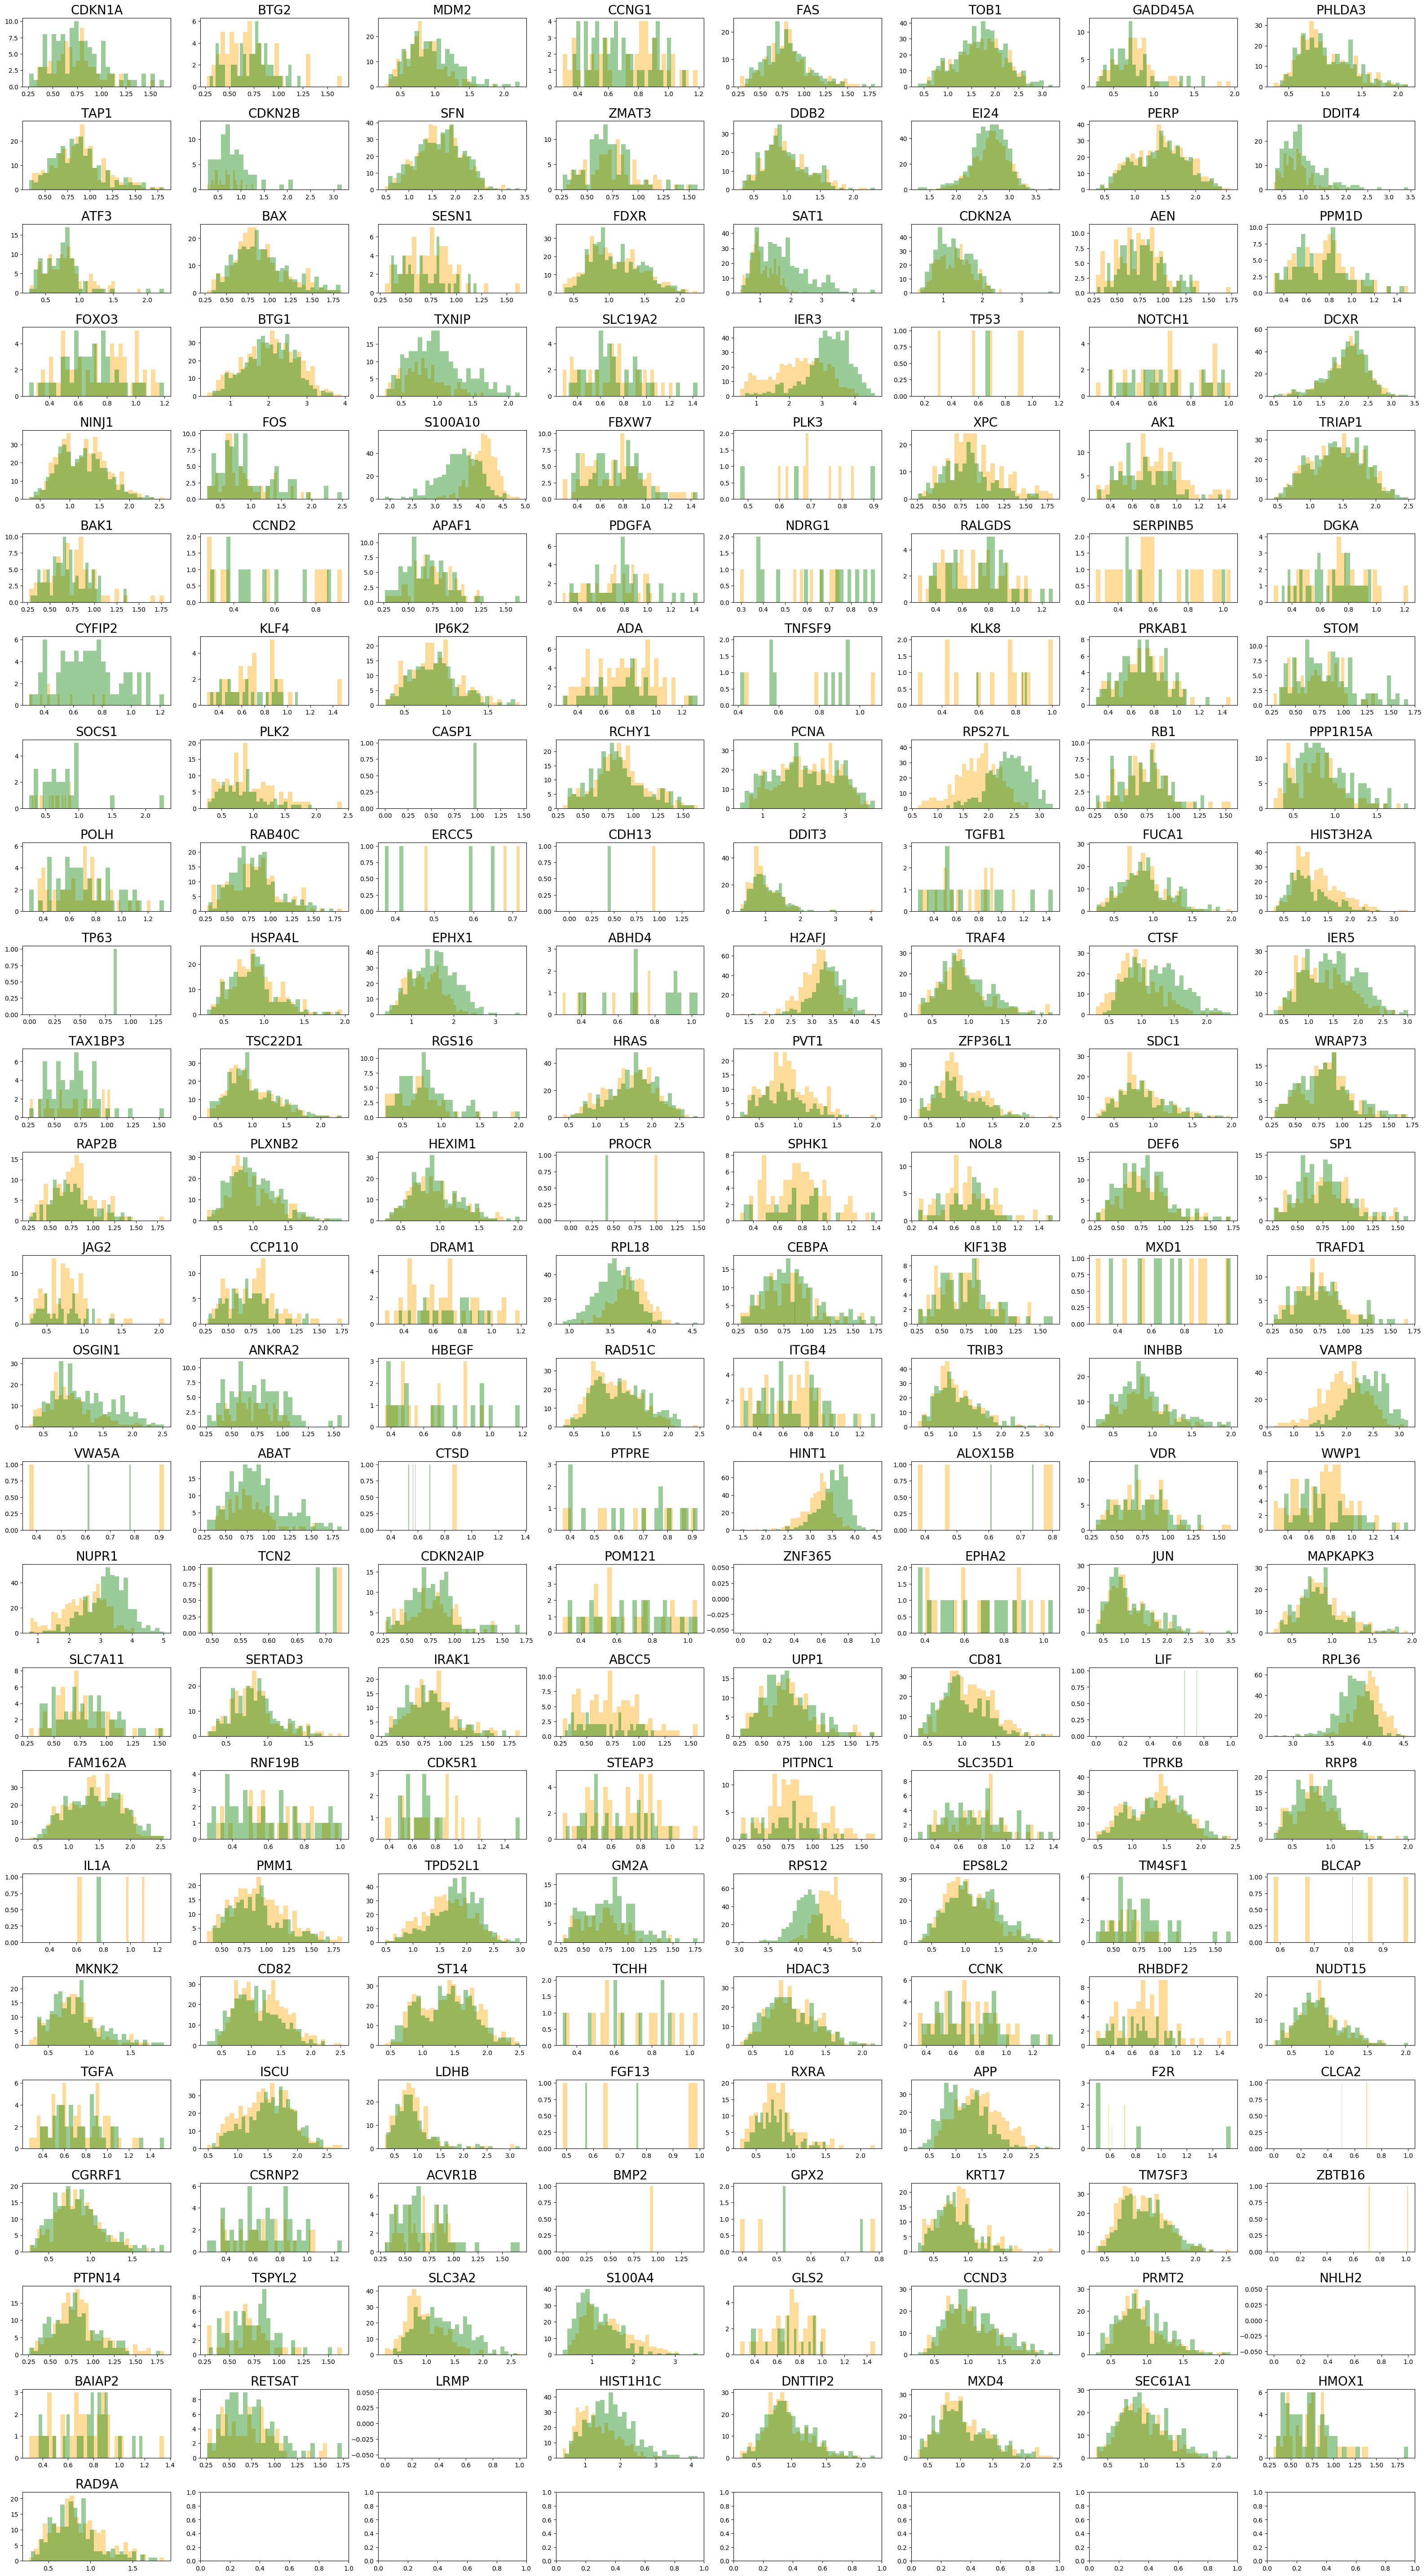

In [245]:
gmt = read_gmt('../data/GSVA/h.all.v6.2.symbols.gmt')
genes = [g for g in gmt['HALLMARK_P53_PATHWAY'.lower()] if g in ref_norm.var_names]

nplots = len(genes)
ncols = 8
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes):

    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].X.toarray()
    ko_expr = ref_norm[cells_ko,gene].X.toarray()
    ax.hist(wt_expr[wt_expr>0], bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr[ko_expr>0], bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)

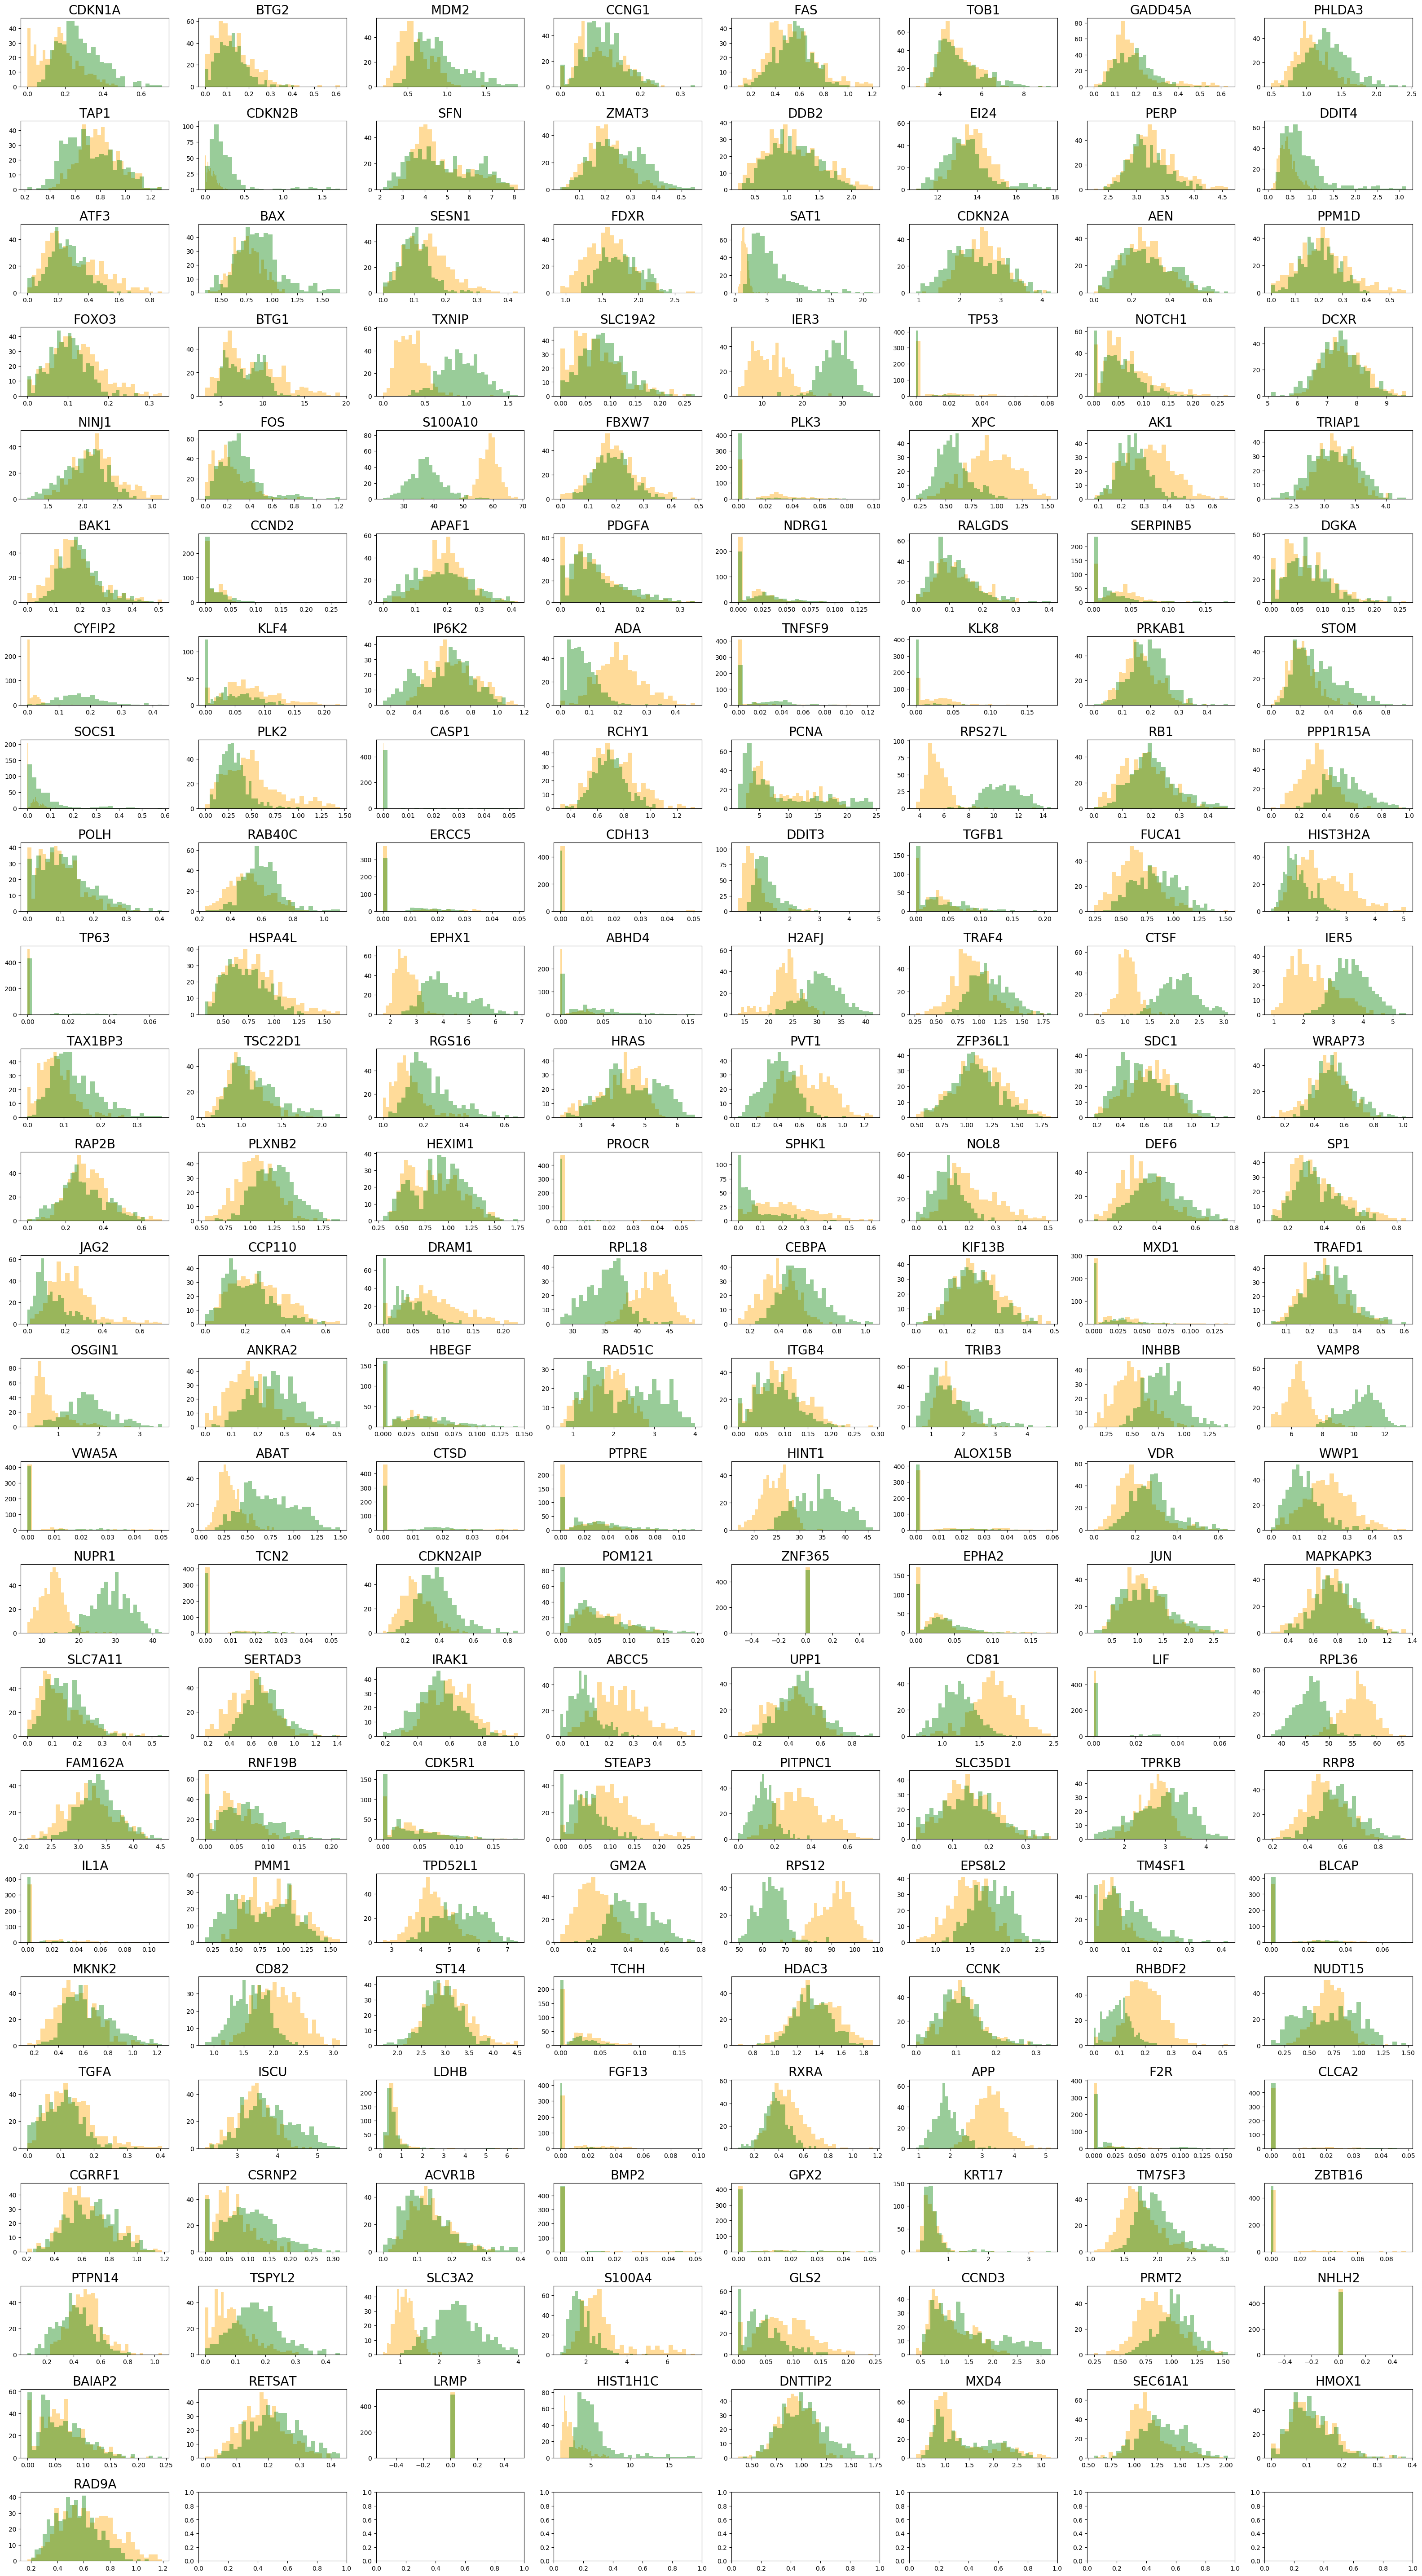

In [246]:
gmt = read_gmt('../data/GSVA/h.all.v6.2.symbols.gmt')
genes = [g for g in gmt['HALLMARK_P53_PATHWAY'.lower()] if g in ref_norm.var_names]

nplots = len(genes)
ncols = 8
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*5, nrows*3), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes):

    ax = axes_list[n]
    wt_expr = ref_norm[cells_wt,gene].layers['Ms'].toarray().flatten()
    ko_expr = ref_norm[cells_ko,gene].layers['Ms'].toarray().flatten()
    ax.hist(wt_expr, bins=30, color='orange', alpha=.4,label='T47D WT')
    ax.hist(ko_expr, bins=30, color='green', alpha=.4,label='T47D KO')
    ax.set_title(gene, fontsize=20)

In [ ]:
from gprofiler import GProfiler
gmt = read_gmt('../data/GSVA/h.all.v6.2.symbols.gmt')

term='HALLMARK_P53_PATHWAY'
genes = [g for g in gmt['HALLMARK_P53_PATHWAY'.lower()] if g in ref_norm.var_names]

gp = GProfiler(return_dataframe=True)
desc = gp.convert(organism='hsapiens',
            query=genes,
            )[['incoming','description']]

desc.loc[:,'weight'] = sel[sel['T47D KO']>0]['T47D KO'].values
desc = desc.sort_values('weight', ascending=False)
desc.to_csv('../data/ExpTmp/desc..csv')

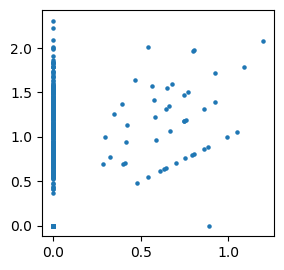

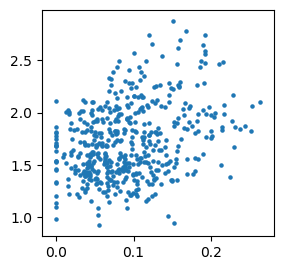

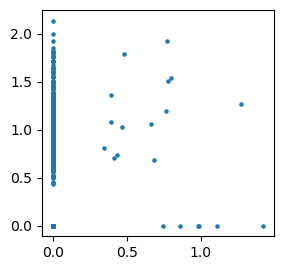

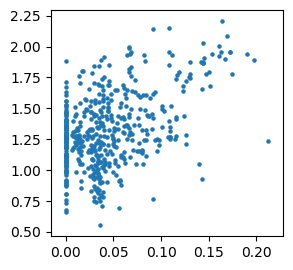

In [218]:
x = sel_norm[cells_ko,'IRF1'].X.toarray()
y = sel_norm[cells_ko,'MCL1'].X.toarray()

plt.figure(figsize=(3,3),dpi=100)
plt.scatter(x,y,s=5)

x = sel_norm[cells_ko,'IRF1'].layers['Ms']
y = sel_norm[cells_ko,'MCL1'].layers['Ms']

plt.figure(figsize=(3,3),dpi=100)
plt.scatter(x,y,s=5)

x = sel_norm[cells_wt,'IRF1'].X.toarray()
y = sel_norm[cells_wt,'MCL1'].X.toarray()

plt.figure(figsize=(3,3),dpi=100)
plt.scatter(x,y,s=5)

x = sel_norm[cells_wt,'IRF1'].layers['Ms']
y = sel_norm[cells_wt,'MCL1'].layers['Ms']

plt.figure(figsize=(3,3),dpi=100)
plt.scatter(x,y,s=5)

In [33]:
star_genes = ['IRF1','CD63','MCL1']
sel.loc[star_genes,:]

KeyError: "None of [Index(['IRF1', 'CD63', 'MCL1'], dtype='object', name='index')] are in the [index]"

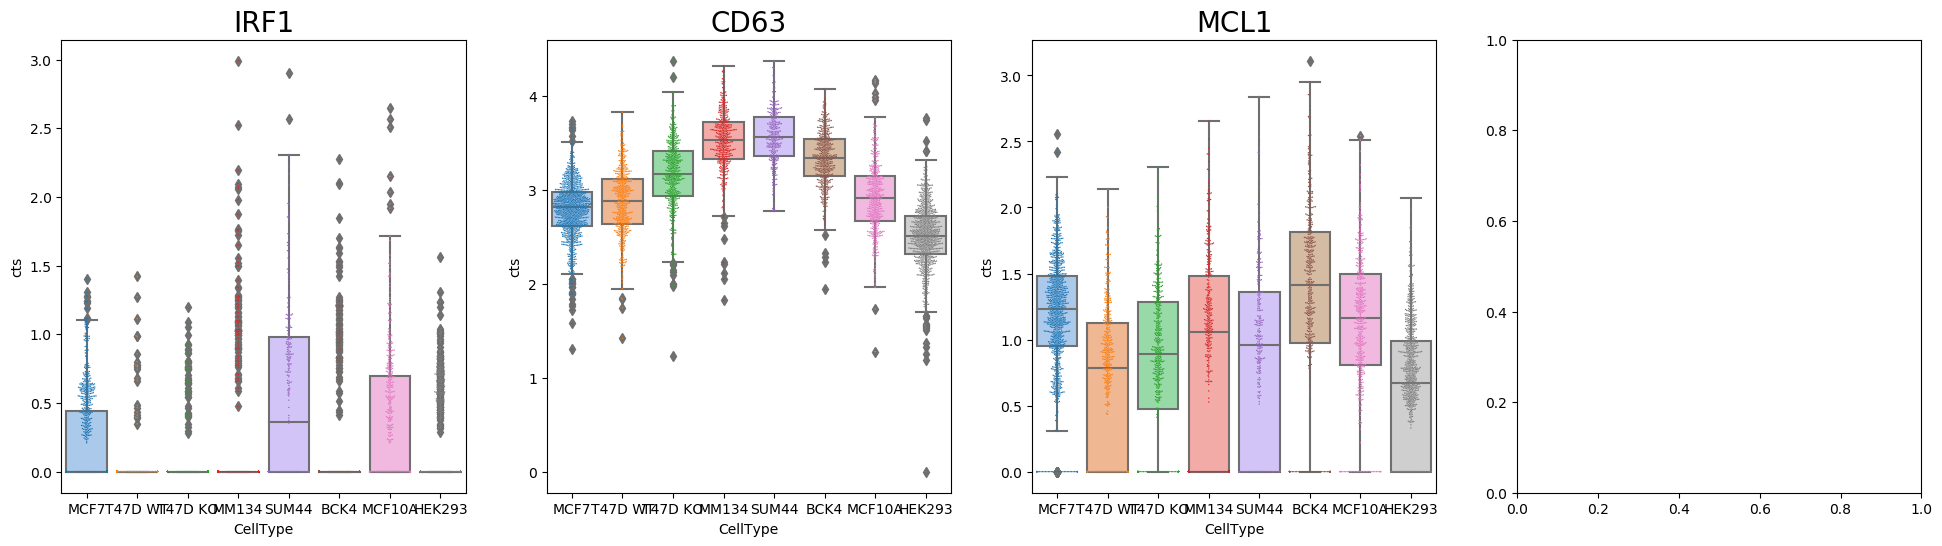

In [221]:
genes = star_genes

nplots = len(genes)
ncols = 4
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*6, nrows*6), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes):

    ax = axes_list[n]
    ax.set_title(gene, fontsize=20)

    df_p = meta.loc[:,['CellType']]
    df_p['cts'] = sel_norm[:,gene].X.toarray()
    
    sns.boxplot(data=df_p, x='CellType', y='cts', ax=ax, palette='pastel')
    if gene=='CD63':    
        sns.swarmplot(data=df_p, x='CellType', y='cts',size=1,dodge=True, ax=ax)

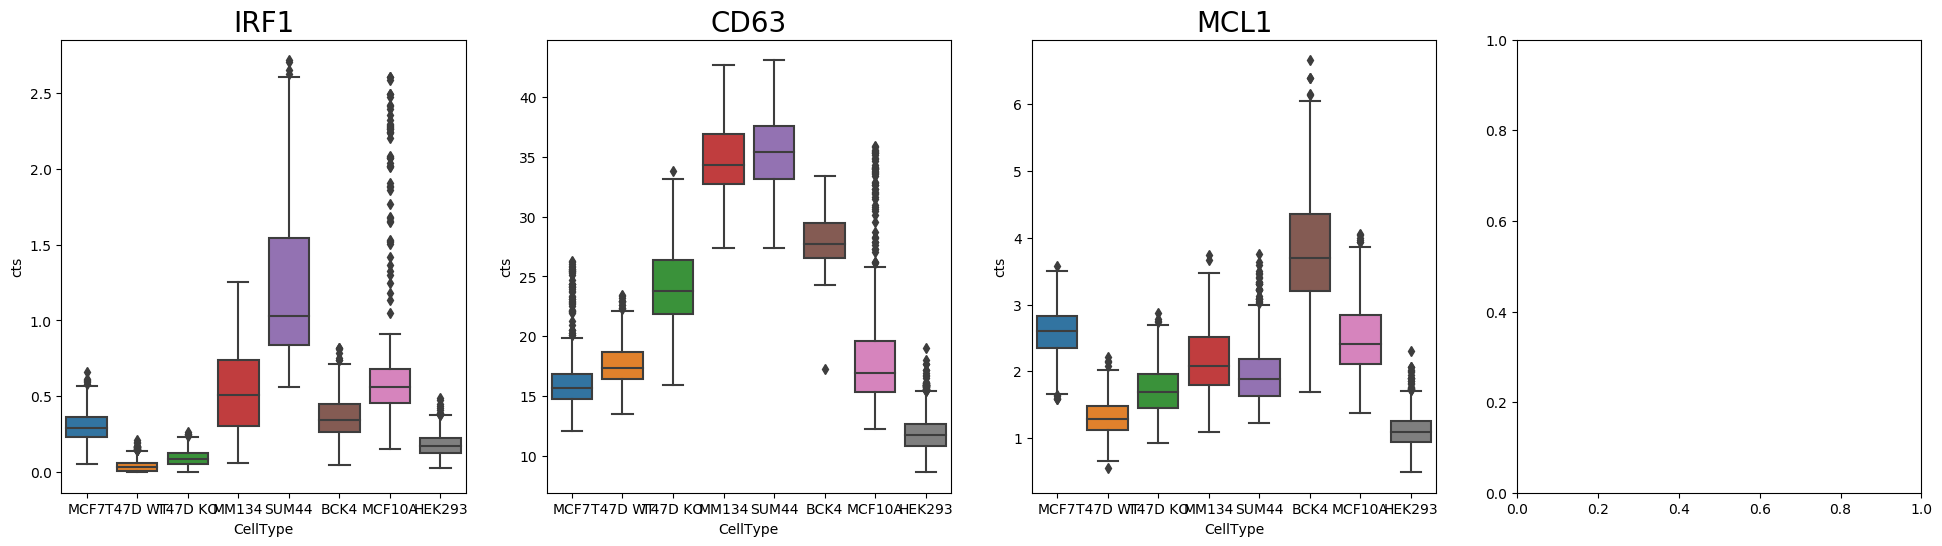

In [222]:
genes = star_genes

nplots = len(genes)
ncols = 4
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*6, nrows*6), dpi=100)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for n, gene in enumerate(genes):

    ax = axes_list[n]
    ax.set_title(gene, fontsize=20)

    df_p = meta.loc[:,['CellType']]
    df_p['cts'] = sel_norm[:,gene].layers['Ms']
    
    sns.boxplot(data=df_p, x='CellType', y='cts', ax=ax)
#     sns.swarmplot(data=df_p, x='CellType', y='cts',dodge=True, ax=ax)

## bulk RNA evidence

### CCLE

In [15]:
datdir = '/Users/chelseachen/Box/WCRC/Lee-Oesterreich-lab-personnel/Current/Chelsea/projects/PublicData/data'

In [21]:
# ccle = anndata.read(f'{datdir}/adata/ccle19.h5ad')
ccle

AnnData object with n_obs × n_vars = 1019 × 54271 
    obs: 'depMapID', 'Name', 'Pathology', 'Site_Primary', 'Site_Subtype1', 'Site_Subtype2', 'Site_Subtype3', 'Histology', 'Hist_Subtype1', 'Hist_Subtype2', 'Hist_Subtype3', 'Gender', 'Life_Stage', 'Age', 'Race', 'Geo_Loc', 'inferred_ethnicity', 'Site_Of_Finding', 'Disease', 'Annotation_Source', 'Original.Source.of.Cell.Line', 'Characteristics', 'Growth.Medium', 'Supplements', 'Freezing.Medium', 'Doubling.Time.from.Vendor', 'Doubling.Time.Calculated.hrs', 'type', 'type_refined', 'PATHOLOGIST_ANNOTATION', 'mutRate', 'tcga_code'
    layers: 'cts', 'rpkm', 'tpm'

In [46]:
brca = ccle[ccle.obs['type']=='breast']
brca

View of AnnData object with n_obs × n_vars = 57 × 54271 
    obs: 'depMapID', 'Name', 'Pathology', 'Site_Primary', 'Site_Subtype1', 'Site_Subtype2', 'Site_Subtype3', 'Histology', 'Hist_Subtype1', 'Hist_Subtype2', 'Hist_Subtype3', 'Gender', 'Life_Stage', 'Age', 'Race', 'Geo_Loc', 'inferred_ethnicity', 'Site_Of_Finding', 'Disease', 'Annotation_Source', 'Original.Source.of.Cell.Line', 'Characteristics', 'Growth.Medium', 'Supplements', 'Freezing.Medium', 'Doubling.Time.from.Vendor', 'Doubling.Time.Calculated.hrs', 'type', 'type_refined', 'PATHOLOGIST_ANNOTATION', 'mutRate', 'tcga_code'
    layers: 'cts', 'rpkm', 'tpm'

(0, 16000)

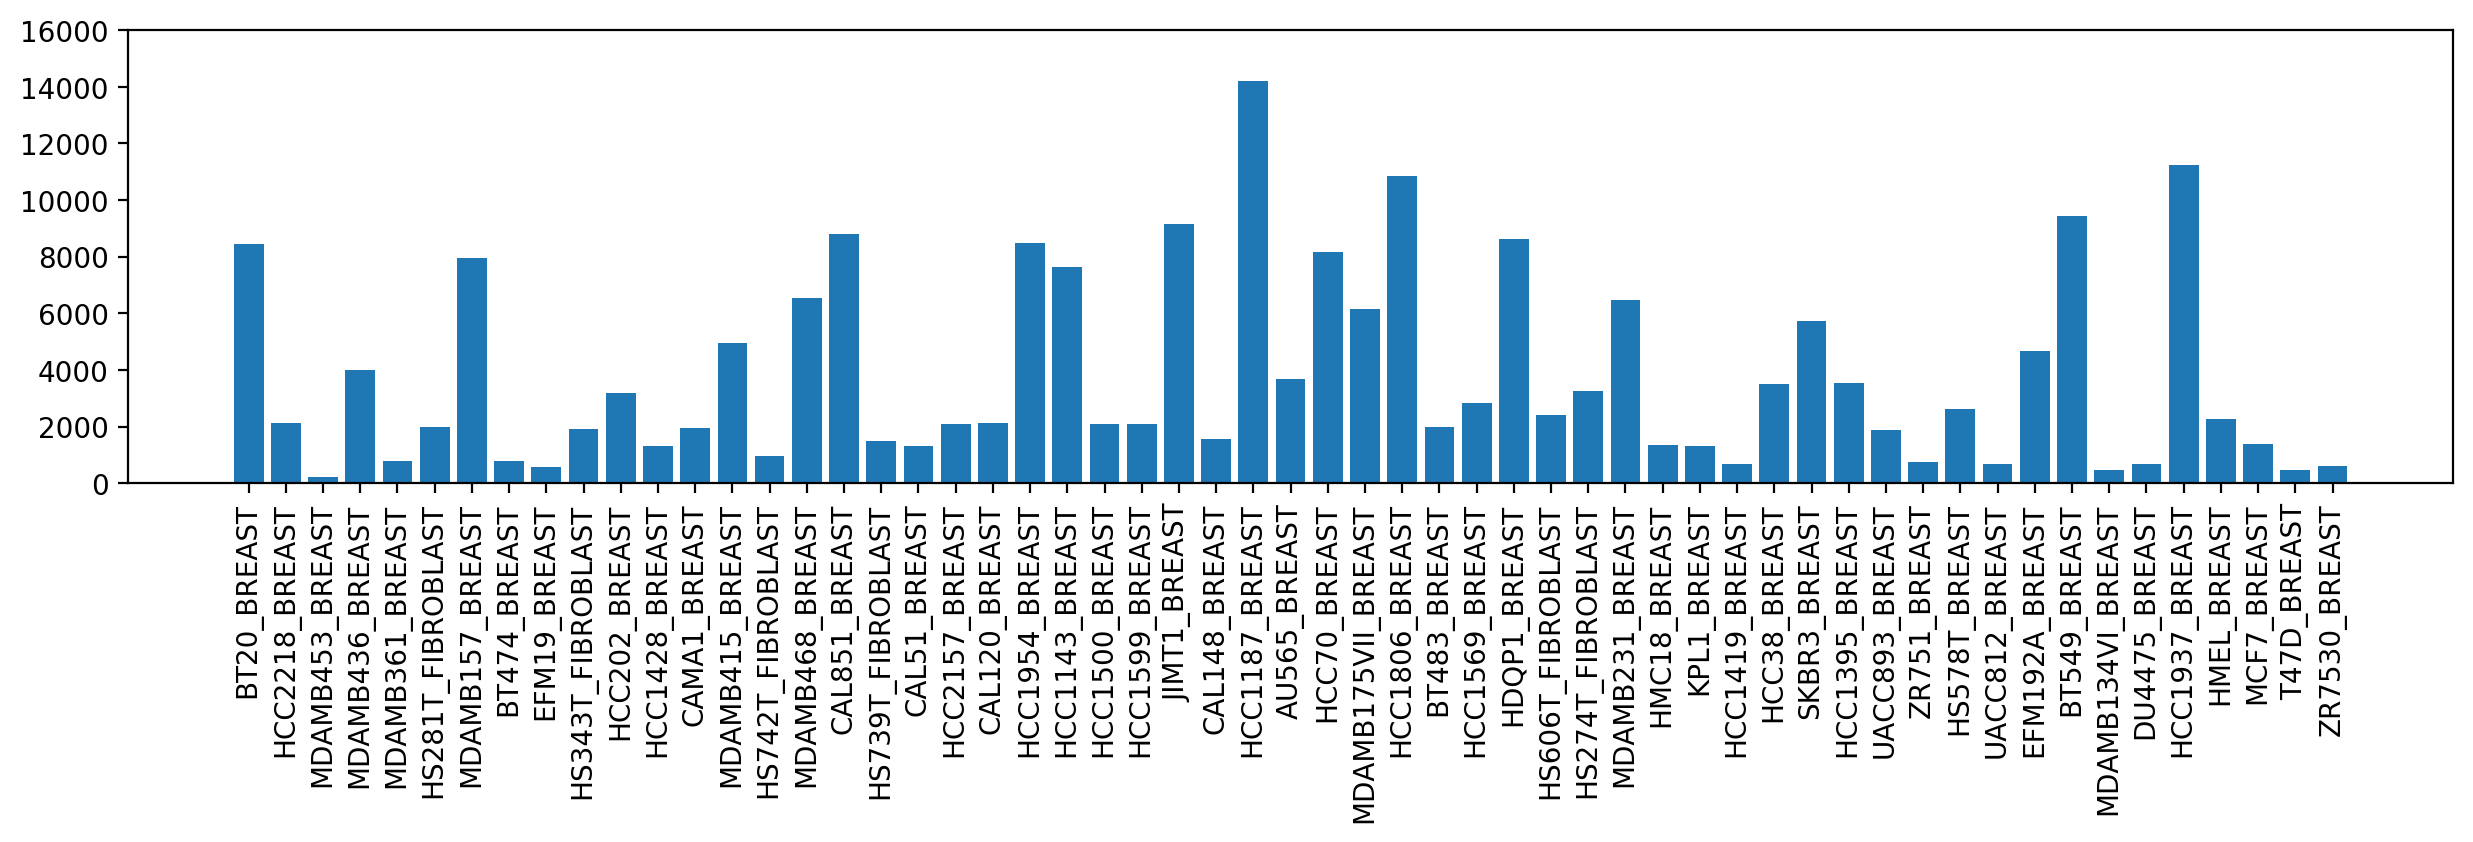

In [49]:
fig,ax = plt.subplots(figsize=(15,3),dpi=200)
ax.bar(np.arange(brca.shape[0]), brca[:,'IRF1'].X)
ax.set_xticks(np.arange(brca.shape[0]))
ax.set_xticklabels(brca.obs_names, rotation=90)
ax.set_ylim(0,16000)

In [4]:
bulk = pd.read_csv('../data/BulkCellLines/brcaLines.tmmNorm.log2cpm.shiny.csv', index_col=0)
bulk

TSPAN6_ENSG00000000003  TNMD_ENSG00000000005  DPM1_ENSG00000000419  \
184A1                   4.360527              0.000000              5.732506   
184B5                   4.542014              0.000000              5.005309   
21MT1                   2.445028              0.000000              4.173822   
21MT2                   3.954956              0.059598              4.646146   
21NT                    3.439208              0.000000              4.607140   
...                          ...                   ...                   ...   
UACC-893                5.266090              0.000000              5.682864   
UACC3199                5.787297              0.000000              5.596265   
ZR-75-1                 3.528790              0.000000              6.188906   
ZR-75-30                5.082334              0.000000              5.651759   
ZR75B                   0.618774              0.000000              4.763706   

          SCYL3_ENSG00000000457  C1orf112_ENSG00000000460  \
184A1                  2.804135                  4.145550   
184B5                  3.570602                  3.342334   
21MT1                  2.606254                  3.606770   
21MT2                  2.370038                  3.976522   
21NT                   2.809345                  3.962869   
...                         ...                       ...   
UACC-893               5.697900                  5.342713   
UACC3199               4.844694                  5.554848   
ZR-75-1                5.335711                  4.535456   
ZR-75-30               5.720845                  4.688387   
ZR75B                  3.845175                  4.185174   

          FGR_ENSG00000000938  CFH_ENSG00000000971  FUCA2_ENSG00000001036  \
184A1                0.943057             3.262574               5.016355   
184B5                0.144913             1.002743               6.062273   
21MT1                0.134484             0.793065               5.720936   
21MT2                0.000000             1.403173               6.292588   
21NT                 0.057188             3.674321               6.238025   
...                       ...                  ...                    ...   
UACC-893             0.136029             0.366174               7.978445   
UACC3199             0.193308             1.163913               5.842730   
ZR-75-1              0.182093             1.009539               4.674036   
ZR-75-30             0.000000             0.191500               5.741247   
ZR75B                0.000000             0.000000               6.262538   

          GCLC_ENSG00000001084  NFYA_ENSG00000001167  ...  \
184A1                 5.259556              4.852380  ...   
184B5                 6.807356              5.110540  ...   
21MT1                 5.337447              6.183151  ...   
21MT2                 6.371905              6.056150  ...   
21NT                  6.138835              6.456400  ...   
...                        ...                   ...  ...   
UACC-893              6.543025              5.813977  ...   
UACC3199              4.335391              5.806757  ...   
ZR-75-1               4.350077              4.735375  ...   
ZR-75-30              6.727790              5.517377  ...   
ZR75B                 4.580317              4.311401  ...   

          AC140479.6_ENSG00000282785  AL157888.1_ENSG00000282787  \
184A1                       0.000000                    0.059267   
184B5                       0.000000                    0.074275   
21MT1                       0.107133                    0.573860   
21MT2                       0.000000                    0.464224   
21NT                        0.000000                    0.265651   
...                              ...                         ...   
UACC-893                    0.021441                    0.374765   
UACC3199                    0.000000                    0.140668   
ZR-75-1                     0.000000          

In [5]:
cells_s = ['MCF7','T-47D', 'MDA-MB-134-VI', 'SUM44', 'MCF10A']

sel = bulk.loc[cells_s, ['IRF1_ENSG00000125347','CD63_ENSG00000135404','CASP7_ENSG00000165806','TUBB1_ENSG00000101162','ACTB_ENSG00000075624']]
sel

IRF1_ENSG00000125347  CD63_ENSG00000135404  \
MCF7                       3.599906              9.148085   
T-47D                      2.199144              8.075216   
MDA-MB-134-VI              2.328070              9.052888   
SUM44                      5.187711              9.042655   
MCF10A                     3.968332              8.218671   

               CASP7_ENSG00000165806  TUBB1_ENSG00000101162  \
MCF7                        5.242420               0.850837   
T-47D                       5.984765               0.551580   
MDA-MB-134-VI               4.313159               0.728682   
SUM44                       4.973511               0.073374   
MCF10A                      4.057935               1.864610   

               ACTB_ENSG00000075624  
MCF7                      11.553287  
T-47D                     11.780039  
MDA-MB-134-VI              9.116448  
SUM44                     10.186303  
MCF10A                    13.550464

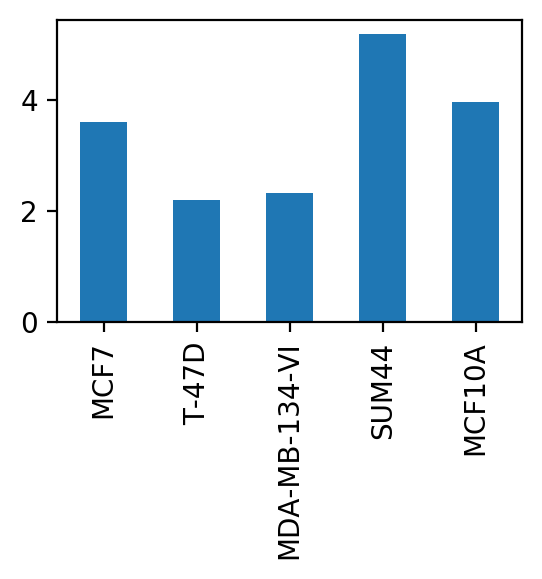

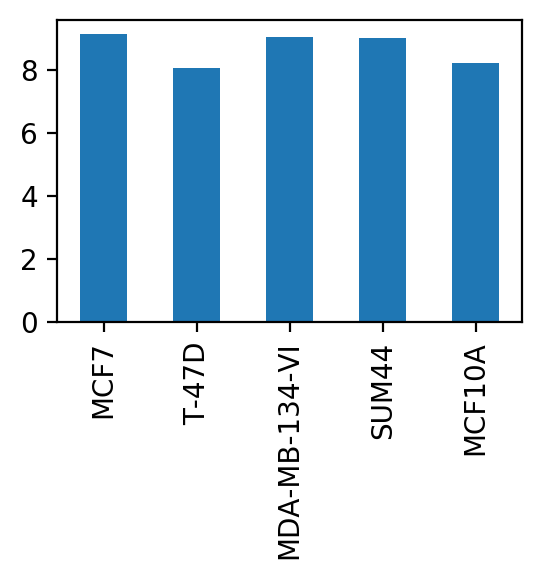

In [111]:
fig,axes = plt.subplots(figsize=(3,2),dpi=200)
sel['IRF1_ENSG00000125347'].plot.bar()
fig,axes = plt.subplots(figsize=(3,2),dpi=200)
sel['CD63_ENSG00000135404'].plot.bar()

### Rather

In [7]:
rather = pd.read_csv('/Users/chelseachen/Box/WCRC/Lee-Oesterreich-lab-personnel/Current/Chelsea/projects/PublicData/data/RATHER18/GSE68057_processed_data_based_on_older_annotations.txt',sep='\t', index_col=0)
cellLines = rather.iloc[:,-15:]
cellLines

CAMA1     EVSAT   HCC1187   HCC2218  MDAMB134VI  MDAMB330  \
ID_REF                                                                        
A1BG           0.730059 -0.533413 -1.736045 -0.857093    0.853345  0.457448   
A1BG.AS1       0.231551  0.206603 -1.403025 -0.523959    0.076181 -0.101278   
A1CF           0.203685  0.306292 -0.212123  0.533703    0.047290 -0.066052   
A2M           -0.432744 -1.344530 -1.222641 -1.177872    0.387611 -0.621691   
A2ML1          0.213813  0.595766 -0.631470 -0.317063   -0.560596 -0.226686   
...                 ...       ...       ...       ...         ...       ...   
A_32_P99183   -0.135327  0.155939  0.103280 -0.480690    0.169853 -0.229830   
A_33_P3226479 -0.195949  0.169568 -0.162199  0.065798    0.111756 -0.309393   
A_33_P3262854  0.916109 -0.287285  0.070181 -0.262269    0.275615 -0.271095   
A_33_P3334826  0.389082  0.396014  0.066454 -0.426279    0.053498  1.360517   
A_33_P3337259  0.021978 -0.245466 -0.494770  0.179705   -0.214402 -0.263682   

               MDAMB453  MDAMB468    MPE600     OCUBF     OCUBM     SkBr3  \
ID_REF                                                                      
A1BG           0.550060 -1.067444 -0.446663  0.233198  0.826489 -0.283500   
A1BG.AS1       0.568098 -0.047653  0.333765  0.487813  0.377570  0.509882   
A1CF          -0.213869 -0.663206  0.295470  0.070500 -0.113322 -0.474836   
A2M           -1.584532  1.322939 -1.401192  0.116301  0.056747 -1.114082   
A2ML1         -0.401774 -0.180645  0.969343 -0.105555 -0.137247  1.596038   
...                 ...       ...       ...       ...       ...       ...   
A_32_P99183    0.631275  0.611447 -0.251472 -0.468712 -0.521595  0.050891   
A_33_P3226479  0.207995 -0.223571  0.188204 -0.166700 -0.275368  0.175193   
A_33_P3262854  0.202175  0.057864 -0.000959 -0.282866 -0.655977 -0.351288   
A_33_P3334826  0.119706 -0.525730  0.243302 -0.271869 -0.329268 -0.509681   
A_33_P3337259 -0.066741 -0.657832 -0.116156  0.006201  0.264576  0.510624   

                  SkBr5   SUM44PE    ZR7530  
ID_REF                                       
A1BG          -0.093172 -0.142944  0.786347  
A1BG.AS1      -0.741821 -0.307950  0.074911  
A1CF          -0.308081  0.047898  0.598498  
A2M            0.294142  1.181540  0.587710  
A2ML1         -0.515075 -0.519551  0.389052  
...                 ...       ...       ...  
A_32_P99183    0.226556 -0.226562  0.319535  
A_33_P3226479 -0.065706  0.078363  0.484912  
A_33_P3262854 -0.393839  0.467504  0.358142  
A_33_P3334826 -0.068525  0.277447 -0.300689  
A_33_P3337259  0.298210  0.645698  0.196365  

[22942 rows x 15 columns]

In [9]:
cellLines.loc[['IRF1','CD63','CASP7'],['MDAMB134VI','SUM44PE']]

MDAMB134VI   SUM44PE
ID_REF                      
IRF1     -0.007706  0.018468
CD63      0.518260  0.349881
CASP7     0.456802  0.995064

### TCGA

In [11]:
fpath = '../../PublicData/data/adata/tcga15.h5ad'
tcga = anndata.read_h5ad(fpath)

X = tcga.X
E = np.log2(X/np.sum(X, axis=1, keepdims=True)) # sample x gene
E_df = pd.DataFrame(E, index=tcga.obs.index, columns=[f'{x} RNA' for x in tcga.var.index])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


In [12]:
tcga.obs['ER_STATUS_BY_IHC'].unique()

[Positive, Negative, [Not Available], Indeterminate]
Categories (4, object): [Positive, Negative, [Not Available], Indeterminate]

In [13]:
gene = 'CASP7'
df_p = tcga.obs.loc[:,['ONCOTREE_CODE','PAM50','ER_STATUS_BY_IHC']]
df_p.loc[:,'cts'] = E_df[f'{gene} RNA']
df_p

ONCOTREE_CODE   PAM50 ER_STATUS_BY_IHC        cts
index                                                         
TCGA-A1-A0SB          BRCA  Normal         Positive -15.385610
TCGA-A1-A0SD           IDC    LumA         Positive -13.867049
TCGA-A1-A0SE           ILC    LumA         Positive -14.785614
TCGA-A1-A0SF           IDC    LumA         Positive -15.054011
TCGA-A1-A0SH          MDLC    LumA         Negative -15.012985
...                    ...     ...              ...        ...
TCGA-MS-A51U           ILC    LumA         Positive -14.483529
TCGA-OL-A66H          BRCA    LumA         Positive -15.079029
TCGA-OL-A66I           IDC   Basal         Negative -15.263648
TCGA-OL-A66J          MDLC    LumA         Positive -14.695051
TCGA-OL-A66K           ILC    LumA         Positive -15.030272

[817 rows x 4 columns]

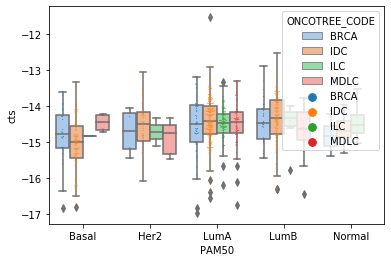

In [14]:
sns.boxplot(data=df_p, x='PAM50',hue='ONCOTREE_CODE',y='cts',palette='pastel')
sns.swarmplot(data=df_p, x='PAM50',hue='ONCOTREE_CODE',y='cts',dodge=True, size=1)


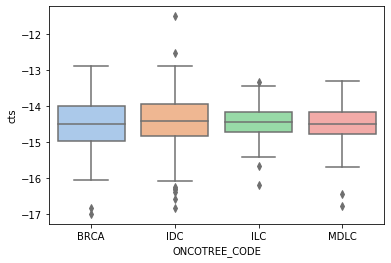

In [15]:
sns.boxplot(data=df_p[df_p['ER_STATUS_BY_IHC']=='Positive'], x='ONCOTREE_CODE',y='cts',palette='pastel')


In [156]:
tcga.obs.groupby(['ER_STATUS_BY_IHC','ONCOTREE_CODE', 'PAM50']).size().unstack()

PAM50                           Basal  Her2  LumA  LumB  Normal
ER_STATUS_BY_IHC ONCOTREE_CODE                                 
Indeterminate    BRCA               0     0     0     0       0
                 IDC                0     2     0     0       0
                 ILC                0     0     0     0       0
                 MDLC               0     0     0     0       0
Negative         BRCA              21     4     0     1       1
                 IDC               94    29     3     2       5
                 ILC                1     2     3     0       2
                 MDLC               4     1     2     0       0
Positive         BRCA               2     3    50    22       3
                 IDC                9    16   184   115       3
                 ILC                0     0   102     5      10
                 MDLC               0     4    51    21       0
[Not Available]  BRCA               1     0     2     3       0
                 IDC                4     4    13     5       1
                 ILC                0     0     1     1       0
                 MDLC               0     0     4     1       0

In [157]:
df_p

ONCOTREE_CODE   PAM50 ER_STATUS_BY_IHC        cts
index                                                         
TCGA-A1-A0SB          BRCA  Normal         Positive -11.396759
TCGA-A1-A0SD           IDC    LumA         Positive -10.733500
TCGA-A1-A0SE           ILC    LumA         Positive -10.616756
TCGA-A1-A0SF           IDC    LumA         Positive -10.393409
TCGA-A1-A0SH          MDLC    LumA         Negative -10.761331
...                    ...     ...              ...        ...
TCGA-MS-A51U           ILC    LumA         Positive -10.992388
TCGA-OL-A66H          BRCA    LumA         Positive -10.442596
TCGA-OL-A66I           IDC   Basal         Negative -10.829728
TCGA-OL-A66J          MDLC    LumA         Positive -10.208966
TCGA-OL-A66K           ILC    LumA         Positive -11.113344

[817 rows x 4 columns]

In [16]:
# sum up, significant IDC vs ILC if 1.PAM50 not-specified 2.in luminal (LumA+LumB) 3.but not if restricted in LumA

from scipy.stats import mannwhitneyu
x = df_p[(df_p['PAM50']=='LumA') & (df_p['ONCOTREE_CODE']=='IDC')]['cts'].values
y = df_p[(df_p['PAM50']=='LumA') & (df_p['ONCOTREE_CODE']=='ILC')]['cts'].values
print(mannwhitneyu(x,y))

x = df_p[df_p['ONCOTREE_CODE']=='IDC']['cts'].values
y = df_p[df_p['ONCOTREE_CODE']=='ILC']['cts'].values
print(mannwhitneyu(x,y))

x = df_p[(df_p['ER_STATUS_BY_IHC']=='Positive') & (df_p['ONCOTREE_CODE']=='IDC')]['cts'].values
y = df_p[(df_p['ER_STATUS_BY_IHC']=='Positive') & (df_p['ONCOTREE_CODE']=='ILC')]['cts'].values
print(mannwhitneyu(x,y))

MannwhitneyuResult(statistic=9654.0, pvalue=0.09959683315019596)
MannwhitneyuResult(statistic=30007.0, pvalue=0.27952899137772796)
MannwhitneyuResult(statistic=17818.0, pvalue=0.13552601709746143)


### Metabric

In [164]:
metabric = pd.read_csv('../data/METABRIC/merged.METABRIC.csv')
metabric

Patient ID ER status measured by IHC ER Status HER2 Status Chemotherapy  \
0       MB-0000                   Positve  Positive    Negative           NO   
1       MB-0002                   Positve  Positive    Negative           NO   
2       MB-0005                   Positve  Positive    Negative          YES   
3       MB-0006                   Positve  Positive    Negative          YES   
4       MB-0008                   Positve  Positive    Negative          YES   
...         ...                       ...       ...         ...          ...   
1969    MB-7295                   Positve  Positive    Negative           NO   
1970    MB-7296                   Positve  Positive    Positive           NO   
1971    MB-7297                   Positve  Positive    Negative           NO   
1972    MB-7298                   Positve  Positive    Negative           NO   
1973    MB-7299                   Positve  Positive    Negative           NO   

     Hormone Therapy histological_type ER_IHC_status  \
0                YES               IDC           pos   
1                YES               IDC           pos   
2                YES               IDC           pos   
3                YES               IDC           pos   
4                YES               IDC           pos   
...              ...               ...           ...   
1969             YES               IDC           pos   
1970              NO               IDC           pos   
1971             YES               IDC           pos   
1972             YES               IDC           pos   
1973             YES               IDC           pos   

     NOT_IN_OSLOVAL_Pam50Subtype  DSS.time  ...    ZWILCH     ZWINT      ZXDA  \
0                         Normal      2999  ...  7.902656  6.735972  6.684956   
1                           LumA      1484  ...  8.754673  7.585565  6.820431   
2                           LumB      3053  ...  8.283935  7.694362  6.639435   
3                           LumB      1721  ...  7.909397  7.155651  6.656220   
4                           LumB      1241  ...  9.158076  8.760492  6.903070   
...                          ...       ...  ...       ...       ...       ...   
1969                        LumA      5906  ...  8.712498  8.177212  6.942689   
1970                        LumB      1342  ...  9.722353  8.814526  6.635927   
1971                        LumB      5279  ...  8.825003  8.869187  6.838137   
1972                        LumB      2587  ...  8.140612  9.165910  6.752059   
1973                        LumB      5893  ...  8.957983  7.807974  7.051547   

          ZXDB      ZXDC    ZYG11A    ZYG11B       ZYX     ZZEF1      ZZZ3  
0     5.854132  5.951922  5.145089  9.610073  7.653177  6.733829  9.247073  
1     6.948638  6.120227  5.441829  9.462491  7.099366  6.588424  9.527226  
2     7.031405  5.853950  5.198112  9.286165  8.462734  6.719054  8.506614  
3     6.364015  6.379404  5.663348  9.262686  8.586281  7.563769  9.055182  
4     6.285070  7.050580  5.443562  9.041876  6.764432  6.877434  9.315529  
...        ...       ...       ...       ...       ...       ...       ...  
1969  6.047178  5.364617  5.339038  8.618255  8.015332  6.436716  9.048812  
1970  6.321993  5.638006  5.241543  8.128893  7.106770  6.613836  9.020176  
1971  6.744980  5.540328  5.254382  8.446556  7.197591  5.828787  9.390472  
1972  6.589221  6.145979  4.854191  8.647944  7.210183  6.566415  8.780399  
1973  6.322577  5.790894  5.336424  9.409000  7.991024  6.690996  9.321649  

[1974 rows x 19502 columns]

In [168]:
sel = metabric[metabric['ER_IHC_status']=='pos']
sel.groupby(['histological_type', 'NOT_IN_OSLOVAL_Pam50Subtype']).size().unstack()

NOT_IN_OSLOVAL_Pam50Subtype   Basal  Her2   LumA   LumB   NC  Normal
histological_type                                                   
DCIS                            NaN   NaN    2.0    NaN  NaN     NaN
IDC                            49.0  96.0  521.0  384.0  4.0    94.0
IDC+ILC                         3.0   5.0   42.0   23.0  NaN    11.0
IDC-MED                         2.0   2.0    1.0    1.0  NaN     NaN
IDC-MUC                         2.0   1.0   16.0   14.0  NaN     8.0
IDC-TUB                         NaN   2.0   45.0    7.0  1.0     7.0
ILC                             1.0   6.0   60.0   28.0  1.0    33.0
INVASIVE TUMOUR                 NaN   1.0    NaN    1.0  NaN     2.0
MIXED NST AND A SPECIAL TYPE    NaN   NaN    1.0    2.0  NaN     NaN
OTHER                           1.0   NaN    5.0    4.0  NaN     1.0
OTHER INVASIVE                  NaN   NaN    2.0    6.0  NaN     2.0

In [186]:
sel = sel[sel['NOT_IN_OSLOVAL_Pam50Subtype'].isin(['LumA','LumB'])]
sel = sel[sel['histological_type'].isin(['IDC','ILC'])]
df_p = sel.loc[:,['histological_type','IRF1','CD63']]
df_p

histological_type      IRF1       CD63
1                  IDC  6.615689   9.322728
12                 IDC  7.454522   9.524375
15                 IDC  8.031463   8.338486
21                 IDC  6.961872   9.400795
33                 IDC  7.340491   9.771320
...                ...       ...        ...
1953               IDC  8.779058   8.589860
1954               IDC  7.790550   9.558139
1959               ILC  7.301553  10.054934
1967               IDC  8.219289   9.297515
1969               IDC  7.715241   9.032596

[581 rows x 3 columns]

(-0.018961962286780855, 0.6483074835319319)
SpearmanrResult(correlation=-0.015929973512454162, pvalue=0.7015918386478666)


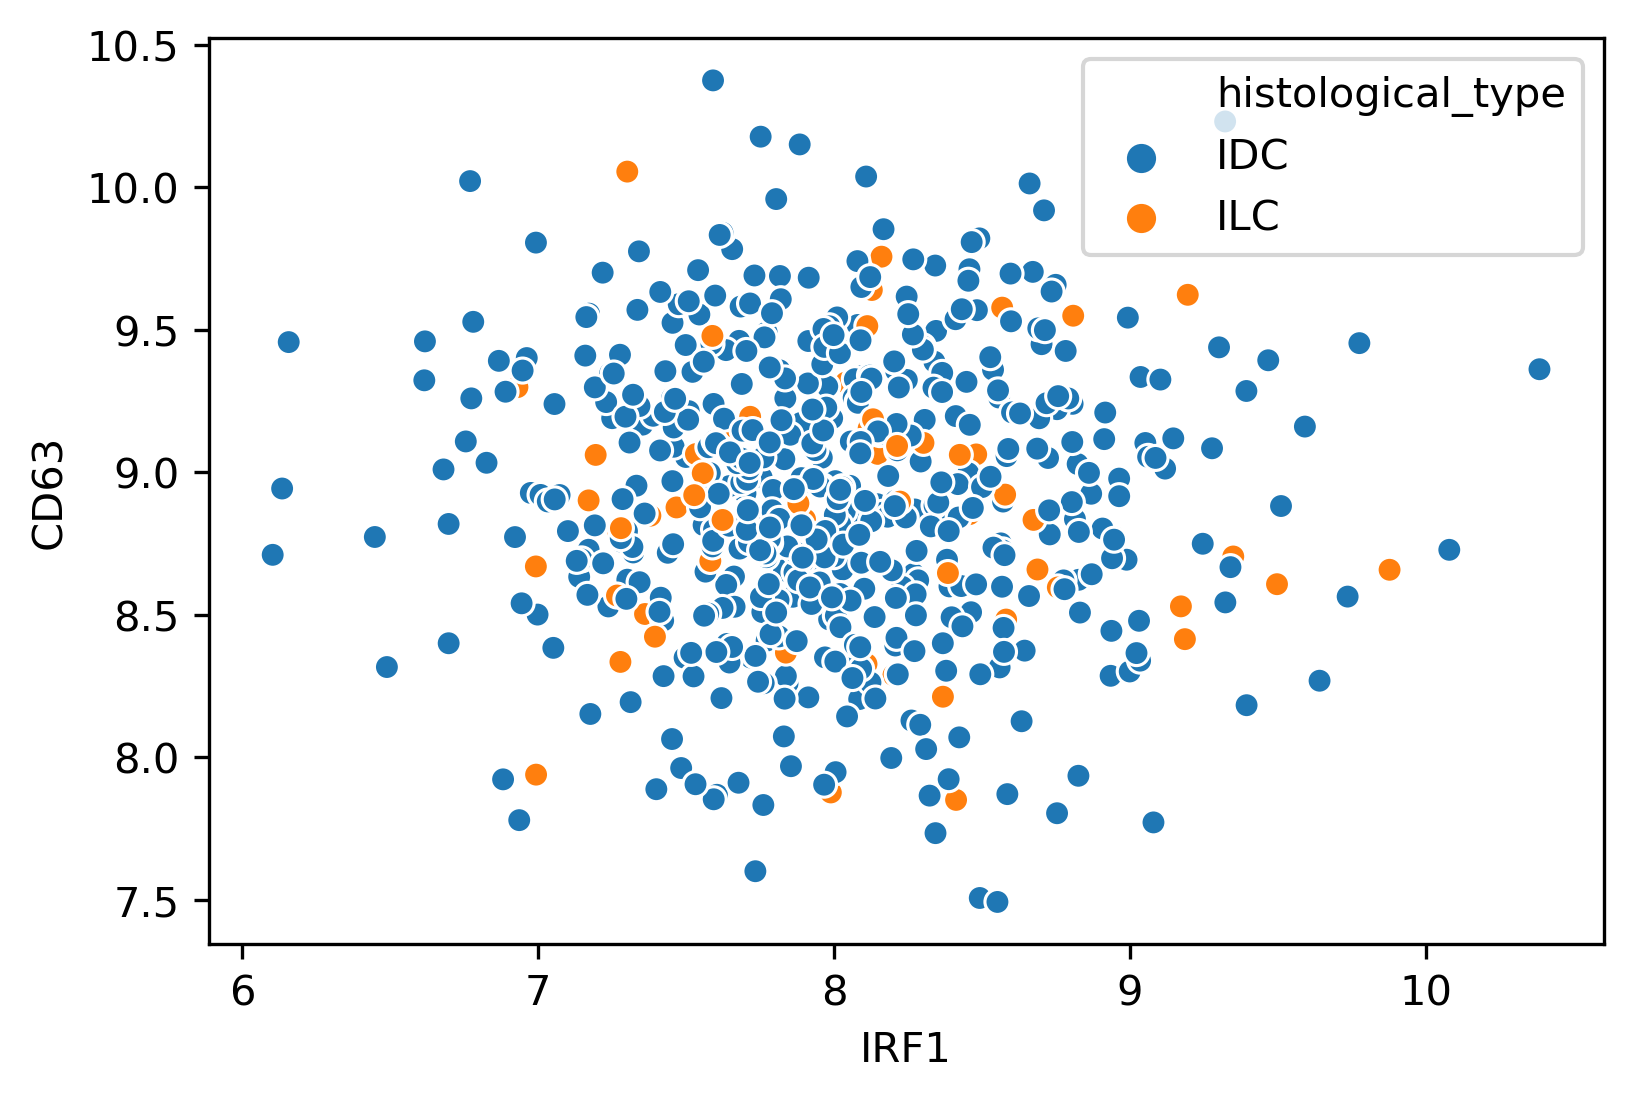

In [190]:
sns.scatterplot(x='IRF1',y='CD63',data=df_p, hue='histological_type')

from scipy.stats import pearsonr,spearmanr
print(pearsonr(df_p['IRF1'].values, df_p['CD63'].values))
print(spearmanr(df_p['IRF1'].values, df_p['CD63'].values))

In [185]:
x = df_p[df_p['histological_type']=='IDC']['CD63'].values
y = df_p[df_p['histological_type']=='ILC']['CD63'].values
print(mannwhitneyu(x,y))

MannwhitneyuResult(statistic=14257.0, pvalue=0.13249555425699255)


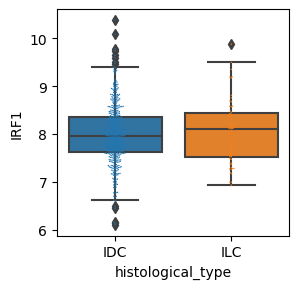

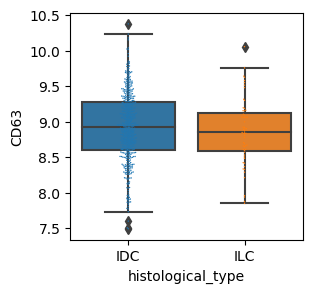

In [187]:
fig,ax=plt.subplots(figsize=(3,3),dpi=100)
sns.boxplot(data=sel, x='histological_type', y='IRF1',ax=ax)
sns.swarmplot(data=sel, x='histological_type', y='IRF1',dodge=True,s=1,ax=ax)


fig,ax=plt.subplots(figsize=(3,3),dpi=100)
sns.boxplot(data=sel, x='histological_type', y='CD63',ax=ax)
sns.swarmplot(data=sel, x='histological_type', y='CD63',dodge=True,s=1,ax=ax)


# t-test

In [97]:
from scipy.stats import ttest_ind

## IRF1

### 050720

In [ ]:
gene = 'IRF1'

In [33]:
import pandas as pd
# Delta Ct value
exprDict = {
    'MM134':[10.31934988,10.31487096,10.24499177],
    'SUM44':[9.493447381,9.64474472,9.689797093],
    'BCK4':[8.88515719,9.216356884,9.310766157],
    'MCF7 WT':[10.51867198,10.60744936,10.62459855],
    'MCF7 KO':[10.44112808,10.57130656,10.390177],
    'T47D WT':[12.91361257,12.82206545,12.64771715],
    'T47D KO':[11.77450005,12.10520887,12.06816638]
}

expr_df = pd.DataFrame(exprDict)
expr_df = 1/2 ** expr_df 
expr_df = expr_df / np.mean(expr_df['T47D WT'].values)
expr_df

MM134     SUM44       BCK4   MCF7 WT   MCF7 KO   T47D WT   T47D KO
0  5.543756  9.827104  14.980943  4.828389  5.095012  0.918022  2.021903
1  5.560994  8.848722  11.907981  4.540227  4.655407  0.978164  1.607707
2  5.836979  8.576664  11.153678  4.486577  5.278166  1.103814  1.649521

Text(0.5, 1.0, 'IRF1')

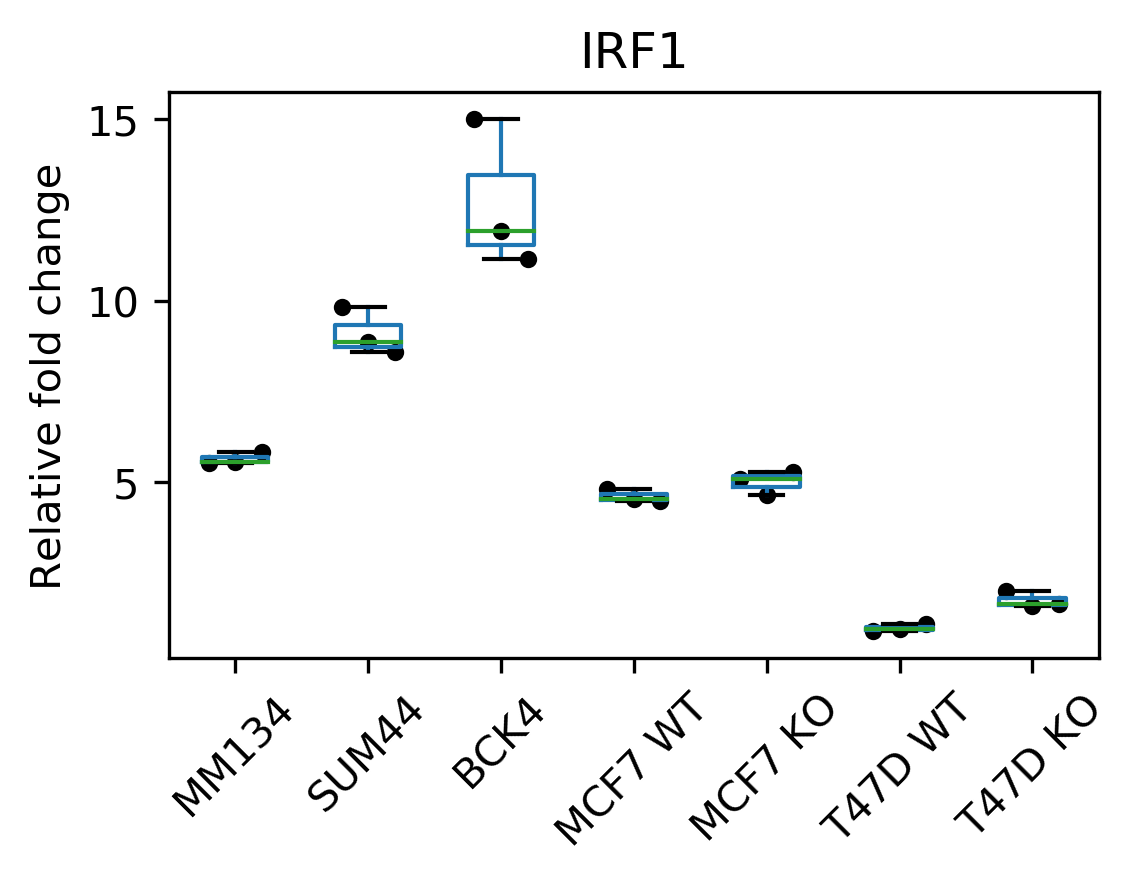

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('figure', dpi=300)

fig,ax = plt.subplots(figsize=(4,2.5))

expr_df.boxplot(ax=ax, rot=45, grid=False)

for i,cell in enumerate(expr_df.columns):
    values = expr_df[cell].values
    for j,y in enumerate(values):
        ax.scatter(x=i+.8+j*.2, y=y, color='k', s=10)


ax.set_ylabel('Relative fold change')
ax.set_title(gene)

In [15]:
import numpy as np
from scipy.stats import ttest_ind

p_mat = np.zeros((expr_df.shape[1],expr_df.shape[1]))

for i,cell_i in enumerate(expr_df.columns):
    for j,cell_j in enumerate(expr_df.columns):
        x,y = expr_df.loc[:,cell_i].values, expr_df.loc[:,cell_j].values
        stat, p = ttest_ind(x, y)
        p_mat[i,j] = p      

from statsmodels.stats.multitest import multipletests
_, fdr, _, _ = multipletests(p_mat.flatten(), alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
fdr_mat = fdr.reshape(p_mat.shape)

fdr_df = pd.DataFrame(fdr_mat, columns=expr_df.columns, index=expr_df.columns)
fdr_df < 0.05

MM134  SUM44   BCK4  MCF7 WT  MCF7 KO  T47D WT  T47D KO
MM134    False   True   True     True     True     True     True
SUM44     True  False  False     True     True     True     True
BCK4      True  False  False     True     True     True     True
MCF7 WT   True   True   True    False    False     True     True
MCF7 KO   True   True   True    False    False     True     True
T47D WT   True   True   True     True     True    False     True
T47D KO   True   True   True     True     True     True    False

### 040620

In [ ]:
gene = 'IRF1'

In [33]:
import pandas as pd
# Delta Ct value
exprDict = {
    'MM134':[10.31934988,10.31487096,10.24499177],
    'SUM44':[9.493447381,9.64474472,9.689797093],
    'BCK4':[8.88515719,9.216356884,9.310766157],
    'MCF7 WT':[10.51867198,10.60744936,10.62459855],
    'MCF7 KO':[10.44112808,10.57130656,10.390177],
    'T47D WT':[12.91361257,12.82206545,12.64771715],
    'T47D KO':[11.77450005,12.10520887,12.06816638]
}

expr_df = pd.DataFrame(exprDict)
expr_df = 1/2 ** expr_df 
expr_df = expr_df / np.mean(expr_df['T47D WT'].values)
expr_df

MM134     SUM44       BCK4   MCF7 WT   MCF7 KO   T47D WT   T47D KO
0  5.543756  9.827104  14.980943  4.828389  5.095012  0.918022  2.021903
1  5.560994  8.848722  11.907981  4.540227  4.655407  0.978164  1.607707
2  5.836979  8.576664  11.153678  4.486577  5.278166  1.103814  1.649521

Text(0.5, 1.0, 'IRF1')

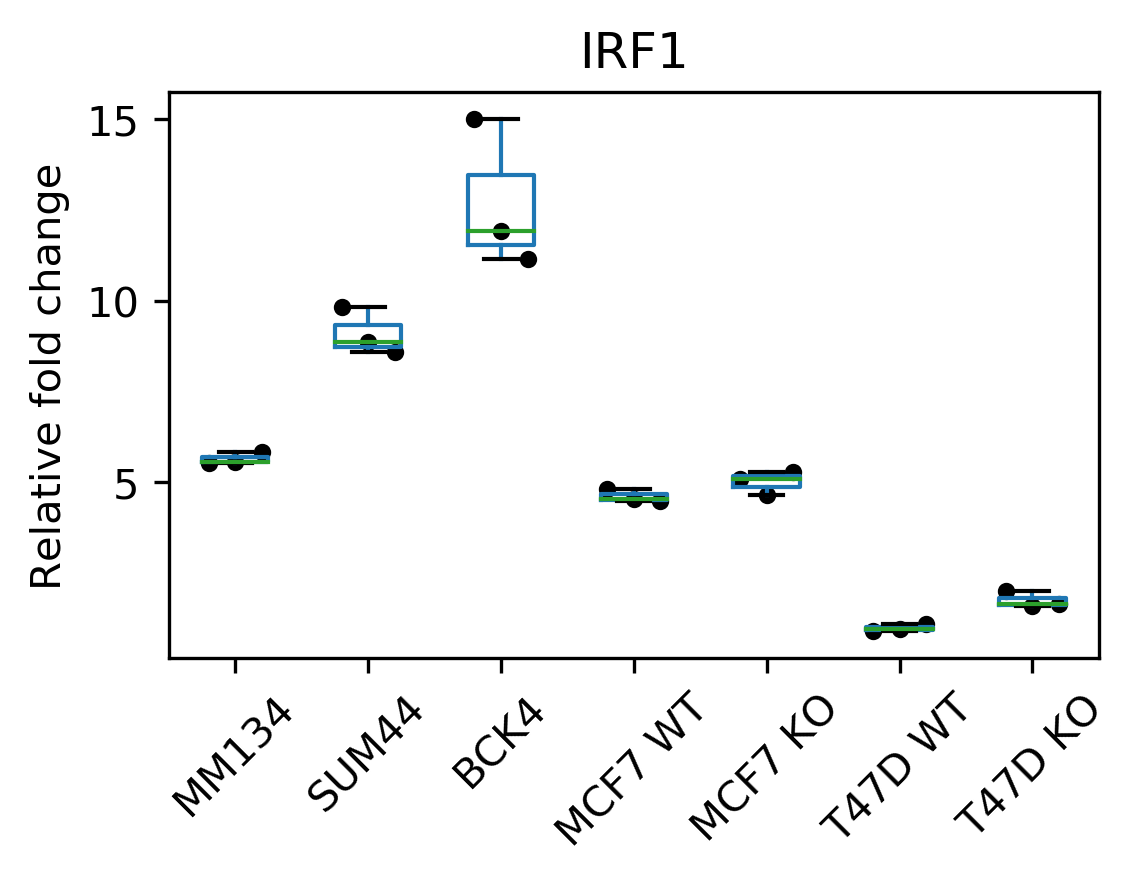

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('figure', dpi=300)

fig,ax = plt.subplots(figsize=(4,2.5))

expr_df.boxplot(ax=ax, rot=45, grid=False)

for i,cell in enumerate(expr_df.columns):
    values = expr_df[cell].values
    for j,y in enumerate(values):
        ax.scatter(x=i+.8+j*.2, y=y, color='k', s=10)


ax.set_ylabel('Relative fold change')
ax.set_title(gene)

In [15]:
import numpy as np
from scipy.stats import ttest_ind

p_mat = np.zeros((expr_df.shape[1],expr_df.shape[1]))

for i,cell_i in enumerate(expr_df.columns):
    for j,cell_j in enumerate(expr_df.columns):
        x,y = expr_df.loc[:,cell_i].values, expr_df.loc[:,cell_j].values
        stat, p = ttest_ind(x, y)
        p_mat[i,j] = p      

from statsmodels.stats.multitest import multipletests
_, fdr, _, _ = multipletests(p_mat.flatten(), alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
fdr_mat = fdr.reshape(p_mat.shape)

fdr_df = pd.DataFrame(fdr_mat, columns=expr_df.columns, index=expr_df.columns)
fdr_df < 0.05

MM134  SUM44   BCK4  MCF7 WT  MCF7 KO  T47D WT  T47D KO
MM134    False   True   True     True     True     True     True
SUM44     True  False  False     True     True     True     True
BCK4      True  False  False     True     True     True     True
MCF7 WT   True   True   True    False    False     True     True
MCF7 KO   True   True   True    False    False     True     True
T47D WT   True   True   True     True     True    False     True
T47D KO   True   True   True     True     True     True    False

### 052020 Kai

In [5]:
import pandas as pd
import numpy as np
gene = 'IRF1'
# Delta Ct value
exprDict = {
'MM134':[5.85931313,7.79674009,4.68593228],
'SUM44':[8.60337285,6.64383066,11.3903323],
'BCK4':[9.11881484,7.90355566,5.33420747],
'MCF7 WT':[4.88191749,2.28458654,2.09711918],
'MCF7 KO':[3.71974112,1.80329607,5.51678644],
'T47D WT':[0.78668108,1.07691567,1.13640325],
'T47D KO':[0.64139749,1.04005,1.01392024]
}

expr_df = pd.DataFrame(exprDict) # already fold change
# expr_df = 1/2 ** expr_df 
# expr_df = expr_df / np.mean(expr_df['T47D WT'].values)
expr_df

MM134      SUM44      BCK4   MCF7 WT   MCF7 KO   T47D WT   T47D KO
0  5.859313   8.603373  9.118815  4.881917  3.719741  0.786681  0.641397
1  7.796740   6.643831  7.903556  2.284587  1.803296  1.076916  1.040050
2  4.685932  11.390332  5.334207  2.097119  5.516786  1.136403  1.013920

Text(0.5, 1.0, 'IRF1')

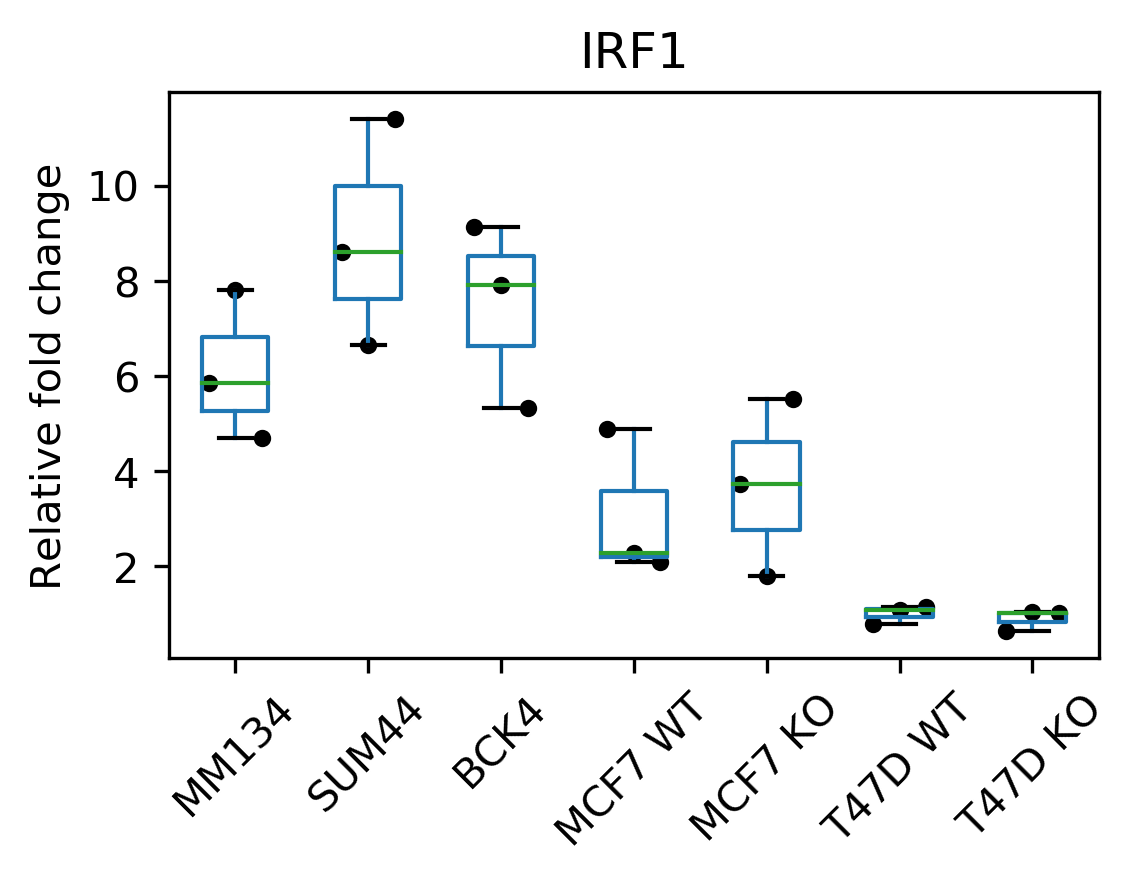

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('figure', dpi=300)

fig,ax = plt.subplots(figsize=(4,2.5))

expr_df.boxplot(ax=ax, rot=45, grid=False)

for i,cell in enumerate(expr_df.columns):
    values = expr_df[cell].values
    for j,y in enumerate(values):
        ax.scatter(x=i+.8+j*.2, y=y, color='k', s=10)


ax.set_ylabel('Relative fold change')
ax.set_title(gene)

In [7]:
import numpy as np
from scipy.stats import ttest_ind

p_mat = np.zeros((expr_df.shape[1],expr_df.shape[1]))

for i,cell_i in enumerate(expr_df.columns):
    for j,cell_j in enumerate(expr_df.columns):
        x,y = expr_df.loc[:,cell_i].values, expr_df.loc[:,cell_j].values
        stat, p = ttest_ind(x, y)
        p_mat[i,j] = p      

from statsmodels.stats.multitest import multipletests
_, fdr, _, _ = multipletests(p_mat.flatten(), alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
fdr_mat = fdr.reshape(p_mat.shape)

fdr_df = pd.DataFrame(fdr_mat, columns=expr_df.columns, index=expr_df.columns)
fdr_df < 0.05

MM134  SUM44   BCK4  MCF7 WT  MCF7 KO  T47D WT  T47D KO
MM134    False  False  False    False    False     True     True
SUM44    False  False  False    False    False     True     True
BCK4     False  False  False    False    False     True     True
MCF7 WT  False  False  False    False    False    False    False
MCF7 KO  False  False  False    False    False    False    False
T47D WT   True   True   True    False    False    False    False
T47D KO   True   True   True    False    False    False    False

## CASP7

In [51]:
gene = 'CASP7'

In [52]:
import pandas as pd
# Delta Ct value
exprDict = {
    'MM134':[6.958110733,7.194709839,7.108847701],
    'SUM44':[8.337153934,8.961072492,9.018277861],
    'BCK4':[6.842219529,6.964106605,7.302895244],
    'MCF7 WT':[9.44089139,9.634178854,10.19302123],
    'MCF7 KO':[8.928013068,8.832336572,8.91160656],
    'T47D WT':[8.400376032,8.317703497,8.1426299],
    'T47D KO':[6.328945551,6.403844871,7.456625776]
}

expr_df = pd.DataFrame(exprDict)
expr_df = 1/2 ** expr_df 
expr_df = expr_df / np.mean(expr_df['T47D WT'].values)
expr_df

MM134     SUM44      BCK4   MCF7 WT   MCF7 KO   T47D WT   T47D KO
0  2.504900  0.963068  2.714421  0.448125  0.639427  0.921776  3.874254
1  2.126018  0.624941  2.494511  0.391935  0.683270  0.976140  3.678249
2  2.256390  0.600646  1.972423  0.266064  0.646740  1.102084  1.773056

Text(0.5, 1.0, 'CASP7')

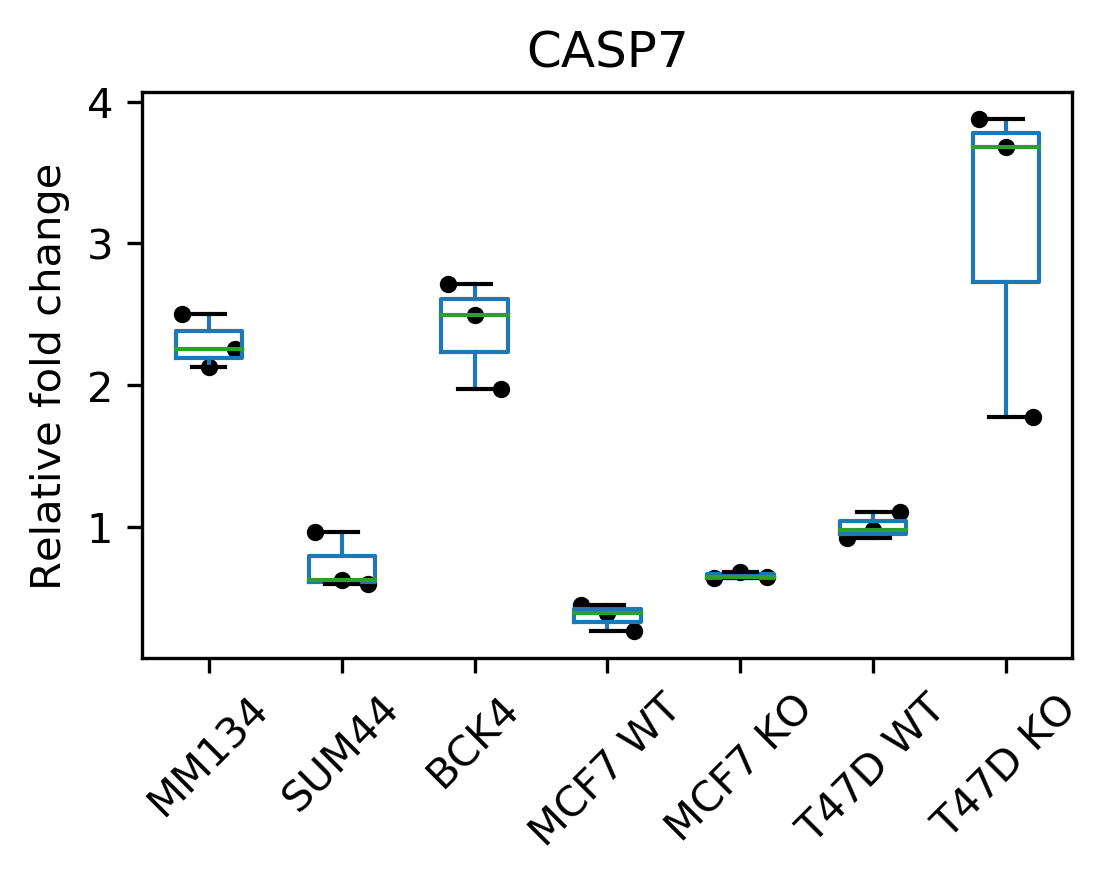

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('figure', dpi=300)

fig,ax = plt.subplots(figsize=(4,2.5))

expr_df.boxplot(ax=ax, rot=45, grid=False)

for i,cell in enumerate(expr_df.columns):
    values = expr_df[cell].values
    for j,y in enumerate(values):
        ax.scatter(x=i+.8+j*.2, y=y, color='k', s=10)


ax.set_ylabel('Relative fold change')
ax.set_title(gene)

In [54]:
import numpy as np
from scipy.stats import ttest_ind

p_mat = np.zeros((expr_df.shape[1],expr_df.shape[1]))

for i,cell_i in enumerate(expr_df.columns):
    for j,cell_j in enumerate(expr_df.columns):
        x,y = expr_df.loc[:,cell_i].values, expr_df.loc[:,cell_j].values
        stat, p = ttest_ind(x, y)
        p_mat[i,j] = p      

from statsmodels.stats.multitest import multipletests
_, fdr, _, _ = multipletests(p_mat.flatten(), alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
fdr_mat = fdr.reshape(p_mat.shape)

fdr_df = pd.DataFrame(fdr_mat, columns=expr_df.columns, index=expr_df.columns)
fdr_df < 0.05

MM134  SUM44   BCK4  MCF7 WT  MCF7 KO  T47D WT  T47D KO
MM134    False   True  False     True     True     True    False
SUM44     True  False   True    False    False    False     True
BCK4     False   True  False     True     True     True    False
MCF7 WT   True  False   True    False     True     True     True
MCF7 KO   True  False   True     True    False     True     True
T47D WT   True  False   True     True     True    False    False
T47D KO  False   True  False     True     True    False    False